In [ ]:
import io
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from scipy import stats

import warnings
import matplotlib as mpl

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'
mpl.rc("font", family='AppleGothic')
mpl.rc('axes', unicode_minus=False)

In [ ]:
# 파일 불러오기

from google.colab import files
files.upload()

Saving vgames2.csv to vgames2 (1).csv


{'vgames2.csv': b'"","Name","Platform","Year","Genre","Publisher","NA_Sales","EU_Sales","JP_Sales","Other_Sales"\n"1","Candace Kane\'s Candy Factory","DS","2008","Action","Destineer","0.04","0","0","0"\n"2","The Munchables","Wii","2009","Action","Namco Bandai Games","0.17","0","0","0.01"\n"3","Otome wa Oanesama Boku ni Koi Shiteru Portable","PSP","2010","Adventure","Alchemist","0","0","0.02","0"\n"4","Deal or No Deal: Special Edition","DS","2010","Misc","Zoo Games","0.04","0","0","0"\n"5","Ben 10 Ultimate Alien: Cosmic Destruction","PS3","2010","Platform","D3Publisher","0.12","0.09","0","0.04"\n"6","Power Pro Kun Pocket 8","DS","2005","Sports","Konami Digital Entertainment","0","0","0.14","0"\n"7","JASF: Jane\'s Advanced Strike Fighters","PC","2011","Simulation","Deep Silver","0.02","0.01","0","0"\n"8","Samurai Warriors: State of War","PSP","2005","Action","Tecmo Koei","0.07","0","0.11","0.01"\n"9","Imabikisou","PS3","2007","Adventure","Sega","0","0","0.04","0"\n"10","The Penguins of M

In [ ]:
games = pd.read_csv('vgames2.csv', index_col = 0)     # index_col = 0 - Unnamed: 0 제거
games.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
# 게임 데이터의 기본 정보
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
# 결측치 개수 확인
games.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
# 데이터를 통일하기 위해 결측값이 있는 행 삭제
games.dropna(axis=0, inplace=True)

In [ ]:
games.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [ ]:
# 출시연도 정수형태로만 표현
games['Year'] = games['Year'].astype(int)

In [ ]:
games['Year'].value_counts()

2009    1418
2008    1413
2010    1246
2007    1192
2011    1123
        ... 
13         2
14         2
2020       1
86         1
94         1
Name: Year, Length: 62, dtype: int64

In [ ]:
# 출시연도 형태 맞추기
games.loc[(games.Year == 13), 'Year'] = 2013
games.loc[(games.Year == 14), 'Year'] = 2014
games.loc[(games.Year == 94), 'Year'] = 1994
games.loc[(games.Year == 86), 'Year'] = 1986
games.loc[(games.Year == 8), 'Year'] = 2008
games.loc[(games.Year == 9), 'Year'] = 2009
games.loc[(games.Year == 6), 'Year'] = 2006
games.loc[(games.Year == 3), 'Year'] = 2003
games.loc[(games.Year == 10), 'Year'] = 2010
games.loc[(games.Year == 15), 'Year'] = 2015
games.loc[(games.Year == 16), 'Year'] = 2016
games.loc[(games.Year == 95), 'Year'] = 1995
games.loc[(games.Year == 4), 'Year'] = 2004
games.loc[(games.Year == 5), 'Year'] = 2005
games.loc[(games.Year == 2), 'Year'] = 2002
games.loc[(games.Year == 98), 'Year'] = 1998
games.loc[(games.Year == 96), 'Year'] = 1996
games.loc[(games.Year == 7), 'Year'] = 2007
games.loc[(games.Year == 97), 'Year'] = 1997
games.loc[(games.Year == 1), 'Year'] = 2001
games.loc[(games.Year == 12), 'Year'] = 2012
games.loc[(games.Year == 11), 'Year'] = 2011

In [ ]:
# Sales 데이터에 숫자만 있는 것, K, M이 붙여져 있는 것 섞여있기 때문에 정규식을 통해서 K, M을 없애고 Million 단위로 통일했습니다.
# K -> M : 10**(1/3)

games.NA_Sales = (games.NA_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
                  games.NA_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**(1/3), 1]).astype(int))

games.EU_Sales = (games.EU_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
                  games.EU_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**(1/3), 1]).astype(int))

games.JP_Sales = (games.JP_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
                  games.JP_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**(1/3), 1]).astype(int))

games.Other_Sales = (games.Other_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
                  games.Other_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**(1/3), 1]).astype(int))

In [ ]:
# Million단위이기 때문에 1000000을 곱해줍니다.
# 하지만 보기 편하게 만단위로 바꾸기 위해 100을 곱해줍니다.
Sales = games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]*100

In [ ]:
Sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,4.0,0.0,0.0,0.0
2,17.0,0.0,0.0,1.0
3,0.0,0.0,2.0,0.0
4,4.0,0.0,0.0,0.0
5,12.0,9.0,0.0,4.0
...,...,...,...,...
16594,15.0,4.0,0.0,1.0
16595,1.0,0.0,0.0,0.0
16596,44.0,19.0,3.0,13.0
16597,5.0,5.0,25.0,3.0


In [ ]:
games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] = Sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

In [ ]:
# categorical 데이터 string으로 데이터 변환
games[['Name', 'Genre', 'Platform', 'Publisher']] = games[['Name', 'Genre', 'Platform', 'Publisher']].convert_dtypes(str)

In [ ]:
# 전처리 끝낸 games 데이터
games.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4.0,0.0,0.0,0.0
2,The Munchables,Wii,2009,Action,Namco Bandai Games,17.0,0.0,0.0,1.0
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,2.0,0.0
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4.0,0.0,0.0,0.0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12.0,9.0,0.0,4.0


In [ ]:
# Total_Sales 추가해줌
games['Total_Sales'] = games['NA_Sales'] + games['EU_Sales'] + games['JP_Sales'] + games['Other_Sales']

In [ ]:
games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4.0,0.0,0.0,0.0,4.0
2,The Munchables,Wii,2009,Action,Namco Bandai Games,17.0,0.0,0.0,1.0,18.0
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,2.0,0.0,2.0
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4.0,0.0,0.0,0.0,4.0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12.0,9.0,0.0,4.0,25.0
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,15.0,4.0,0.0,1.0,20.0
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,1.0,0.0,0.0,0.0,1.0
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,44.0,19.0,3.0,13.0,79.0
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,5.0,5.0,25.0,3.0,38.0


In [ ]:
# Total_Sales 기준으로 내림차순 정렬
# 매출액 기준 Top 10 게임
games_sort = games.sort_values(by='Total_Sales', ascending=False)
games_sort[0:11]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1965,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,820000.0,189.0,145.0,16.0,820350.0
9830,Super Mario Bros. 3,GBA,2003,Platform,Nintendo,586000.0,125.0,83.0,20.0,586228.0
3590,Final Fantasy IX,PS,2000,Role-Playing,SquareSoft,162.0,77.0,556000.0,14.0,556253.0
13936,Crash Team Racing,PS,1999,Racing,Sony Computer Entertainment,514000.0,157.0,44.0,21.0,514222.0
1630,Assassin's Creed III,PS3,2012,Action,Ubisoft,264.0,512000.0,16.0,114.0,512394.0
8011,Battlefield 3,X360,2011,Shooter,Electronic Arts,446.0,426000.0,6.0,69.0,426521.0
11997,Guitar Hero II,X360,2007,Misc,Activision,402000.0,2.0,0.0,17.0,402019.0
9792,Call of Duty: Ghosts,PS4,2013,Shooter,Activision,356000.0,142.0,5.0,38.0,356185.0
4979,Cooking Mama 2: Dinner With Friends,DS,2007,Simulation,505 Games,322000.0,150.0,10.0,39.0,322199.0
6930,NBA 2K12,PS3,2011,Sports,Take-Two Interactive,322000.0,27.0,5.0,18.0,322050.0


In [ ]:
# 지역에 따라서 선호하는 게임 장르가 다를까?

In [ ]:
games['Genre'].value_counts()

Action          3240
Sports          2299
Misc            1681
Role-Playing    1465
Shooter         1280
Adventure       1268
Racing          1219
Platform         873
Simulation       846
Fighting         835
Strategy         669
Puzzle           566
Name: Genre, dtype: Int64

In [ ]:
# 장르와 매출액 데이터 추출
Sales_Genre = games[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
Sales_Genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Action,4.0,0.0,0.0,0.0
2,Action,17.0,0.0,0.0,1.0
3,Adventure,0.0,0.0,2.0,0.0
4,Misc,4.0,0.0,0.0,0.0
5,Platform,12.0,9.0,0.0,4.0
...,...,...,...,...,...
16594,Platform,15.0,4.0,0.0,1.0
16595,Action,1.0,0.0,0.0,0.0
16596,Sports,44.0,19.0,3.0,13.0
16597,Action,5.0,5.0,25.0,3.0


In [ ]:
# 장르별 각 나라 매출액 groupby 평균
Grouped_Sales_Genre = Sales_Genre.groupby('Genre').mean()
Grouped_Sales_Genre

# 매출액의 평균을 기준으로 가장 인기있는 장르를 골랐다.

# 북미에서 가장 인기있는 게임 장르 : Racing       : 929.385562
# 유럽에서 가장 인기있는 게임 장르 : Shooter      : 545.850781	
# 일본에서 가장 인기있는 게임 장르 : Role-Playing : 546.013652

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,460.238272,276.216667,77.019444,61.823457
Adventure,50.593060,27.091483,13.549685,13.929022
Fighting,220.304192,344.731737,53.528144,37.845509
Misc,470.610946,266.865556,33.548483,19.780488
Platform,808.942726,318.366552,63.037801,83.746850
Puzzle,46.203180,26.575972,9.936396,2.197880
Racing,929.385562,122.591468,47.256768,62.031993
Role-Playing,186.863481,16.591126,546.013652,103.481229
Shooter,458.736719,545.850781,9.229688,61.056250


In [ ]:
# 장르가 Racing인 매출액
is_Racing = Sales_Genre['Genre'] == 'Racing'
Racing = Sales_Genre[is_Racing]
Racing

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
11,Racing,96000.0,33.0,0.0,6.0
27,Racing,3.0,2.0,0.0,0.0
30,Racing,14.0,10.0,0.0,2.0
38,Racing,26.0,1.0,0.0,0.0
50,Racing,14.0,9.0,0.0,2.0
...,...,...,...,...,...
16519,Racing,6.0,2.0,0.0,0.0
16534,Racing,0.0,0.0,6.0,0.0
16540,Racing,22.0,0.0,0.0,2.0
16543,Racing,0.0,3.0,0.0,1.0


In [ ]:
# 북미에서 가장 인기있는 게임 장르인 Racing이 유럽의 Racing 장르 선호도와 다를까?
# 가설검정

# H0 : 북미의 Racing 장르 매출액이 유럽의 Racing 장르 매출액과 같을 것이다.   (귀무가설)
# H0 : 북미의 Racing 장르 매출액이 유럽의 Racing 장르 매출액과 다를 것이다.   (대안가설)


stats.ttest_ind(Racing['NA_Sales'], Racing['EU_Sales'])

# P-Value 값이 0.1 미만이지만 0.05보다 크기 때문에 크게 유의미한 차이가 없다. (귀무가설 채택)

Ttest_indResult(statistic=1.6586067814663918, pvalue=0.09732379310048699)

In [ ]:
# 북미에서 가장 인기있는 게임 장르인 Racing이 일본의 Racing 장르 선호도와 다를까?
# 가설검정

# H0 : 북미의 Racing 장르 매출액이 일본의 Racing 장르 매출액과 같을 것이다.   (귀무가설)
# H0 : 북미의 Racing 장르 매출액이 일본의 Racing 장르 매출액과 다를 것이다.   (대안가설)


stats.ttest_ind(Racing['NA_Sales'], Racing['JP_Sales'])

# P-Value 값이 0.1 미만이지만 0.05보다 크기 때문에 크게 유의미한 차이가 없다. (귀무가설 채택)

Ttest_indResult(statistic=1.8221732698797366, pvalue=0.06855125459049453)

In [ ]:
# 북미에서 가장 인기있는 게임 장르인 Racing이 기타 지역의 Racing 장르 선호도와 다를까?
# 가설검정

# H0 : 북미의 Racing 장르 매출액이 기타 지역의 Racing 장르 매출액과 같을 것이다.   (귀무가설)
# H0 : 북미의 Racing 장르 매출액이 기타 지역의 Racing 장르 매출액과 다를 것이다.   (대안가설)


stats.ttest_ind(Racing['NA_Sales'], Racing['Other_Sales'])

# P-Value 값이 0.1 미만이지만 0.05보다 크기 때문에 크게 유의미한 차이가 없다. (귀무가설 채택)

Ttest_indResult(statistic=1.7886787271775322, pvalue=0.07379079270270285)

In [ ]:
# 장르가 Shooter인 매출액

is_Shooter = Sales_Genre['Genre'] == 'Shooter'
Shooter = Sales_Genre[is_Shooter]
Shooter

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
28,Shooter,0.0,23.0,0.0,6.0
33,Shooter,12.0,1.0,2.0,1.0
45,Shooter,51.0,33.0,1.0,8.0
62,Shooter,25.0,17.0,1.0,5.0
65,Shooter,1.0,0.0,0.0,0.0
...,...,...,...,...,...
16551,Shooter,29.0,20.0,0.0,3.0
16552,Shooter,16.0,5.0,0.0,1.0
16553,Shooter,266.0,50.0,5.0,30.0
16585,Shooter,6.0,0.0,0.0,0.0


In [ ]:
# 유럽에서 가장 인기있는 게임 장르인 Shooter가 북미의 Shooter 장르 선호도와 다를까?
# 가설검정

# H0 : 유럽의 Shooter 장르 매출액이 북미의 Shooter 장르 매출액과 같을 것이다.   (귀무가설)
# H0 : 유럽의 Shooter 장르 매출액이 북미의 Shooter 장르 매출액과 다를 것이다.   (대안가설)


stats.ttest_ind(Shooter['EU_Sales'], Shooter['NA_Sales'])

# P-Value 값이 0.85이므로 0.05보다 많이 크다. 그러므로 두 매출액은 거의 차이가 없다고 볼 수 있다. (귀무가설 채택)

Ttest_indResult(statistic=0.18747956675110833, pvalue=0.8512995120213697)

In [ ]:
# 유럽에서 가장 인기있는 게임 장르인 Shooter가 일본의 Shooter 장르 선호도와 다를까?
# 가설검정

# H0 : 유럽의 Shooter 장르 매출액이 일본의 Shooter 장르 매출액과 같을 것이다.   (귀무가설)
# H0 : 유럽의 Shooter 장르 매출액이 일본의 Shooter 장르 매출액과 다를 것이다.   (대안가설)


stats.ttest_ind(Shooter['EU_Sales'], Shooter['JP_Sales'])

# P-Value 값이 0.12이므로 0.05보다 크다. 그러므로 두 매출액은 차이가 없다고 볼 수 있다. (귀무가설 채택)

Ttest_indResult(statistic=1.5241853009953799, pvalue=0.12758604376403204)

In [ ]:
# 유럽에서 가장 인기있는 게임 장르인 Shooter가 기타지역의 Shooter 장르 선호도와 다를까?
# 가설검정

# H0 : 유럽의 Shooter 장르 매출액이 기타지역의 Shooter 장르 매출액과 같을 것이다.   (귀무가설)
# H0 : 유럽의 Shooter 장르 매출액이 기타지역의 Shooter 장르 매출액과 다를 것이다.   (대안가설)


stats.ttest_ind(Shooter['EU_Sales'], Shooter['Other_Sales'])

# P-Value 값이 0.17이므로 0.05보다 크다. 그러므로 두 매출액은 차이가 없다고 볼 수 있다. (귀무가설 채택)

Ttest_indResult(statistic=1.3694835895888915, pvalue=0.17096837327997727)

In [ ]:
# 장르가 Role-Playing인 매출액
is_RolePlaying = Sales_Genre['Genre'] =='Role-Playing'
RolePlaying = Sales_Genre[is_RolePlaying]
RolePlaying

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
13,Role-Playing,0.0,2.0,0.0,0.0
15,Role-Playing,0.0,0.0,2.0,0.0
19,Role-Playing,2.0,0.0,3.0,0.0
41,Role-Playing,30.0,20.0,30.0,6.0
63,Role-Playing,13.0,10.0,4.0,2.0
...,...,...,...,...,...
16550,Role-Playing,20.0,8.0,0.0,1.0
16555,Role-Playing,0.0,0.0,12.0,0.0
16560,Role-Playing,16.0,5.0,12.0,5.0
16575,Role-Playing,11.0,0.0,0.0,0.0


In [ ]:
# 일본에서 가장 인기있는 게임 장르인 Role-Playing이 북미의 Role-Playing 장르 선호도와 다를까?
# 가설검정

# H0 : 일본의 Role-Playing 장르 매출액이 북미의 Role-Playing 장르 매출액과 같을 것이다.   (귀무가설)
# H0 : 일본의 Role-Playing 장르 매출액이 북미의 Role-Playing 장르 매출액과 다를 것이다.   (대안가설)


stats.ttest_ind(RolePlaying['JP_Sales'], RolePlaying['NA_Sales'])

# P-Value 값이 0.36이므로 0.05보다 크다. 그러므로 두 매출액은 차이가 없다고 볼 수 있다. (귀무가설 채택)

Ttest_indResult(statistic=0.9105782858925735, pvalue=0.36259256963786357)

In [ ]:
# 일본에서 가장 인기있는 게임 장르인 Role-Playing이 유럽의 Role-Playing 장르 선호도와 다를까?
# 가설검정

# H0 : 일본의 Role-Playing 장르 매출액이 유럽의 Role-Playing 장르 매출액과 같을 것이다.   (귀무가설)
# H0 : 일본의 Role-Playing 장르 매출액이 유럽의 Role-Playing 장르 매출액과 다를 것이다.   (대안가설)


stats.ttest_ind(RolePlaying['JP_Sales'], RolePlaying['EU_Sales'])

# P-Value 값이 0.16이므로 0.05보다 크다. 그러므로 두 매출액은 차이가 없다고 볼 수 있다. (귀무가설 채택)

Ttest_indResult(statistic=1.3819342379806254, pvalue=0.1670973131347308)

In [ ]:
# 일본에서 가장 인기있는 게임 장르인 Role-Playing이 기타지역의 Role-Playing 장르 선호도와 다를까?
# 가설검정

# H0 : 일본의 Role-Playing 장르 매출액이 기타지역의 Role-Playing 장르 매출액과 같을 것이다.   (귀무가설)
# H0 : 일본의 Role-Playing 장르 매출액이 기타지역의 Role-Playing 장르 매출액과 다를 것이다.   (대안가설)


stats.ttest_ind(RolePlaying['JP_Sales'], RolePlaying['Other_Sales'])

# P-Value 값이 0.25이므로 0.05보다 크다. 그러므로 두 매출액은 차이가 없다고 볼 수 있다. (귀무가설 채택)

Ttest_indResult(statistic=1.1324780358972473, pvalue=0.2575262430294983)

In [ ]:
# 북미의 Racing 장르의 매출과 다른 지역의 Racing 장르 매출을 ttest한 결과
# P-Value 값이 0.1 미만으로 0.05미만의 높은 수준의 신뢰수준은 아니지만 어느 정도 유의미하다고 판단할 수 있다.
# 그러므로 북미에서는 다른 지역들에 비해서 어느정도 Racing 장르에 대한 선호도가 있을 수 있다고 할 수 있다.

In [ ]:
# 연도별 게임의 트렌드가 있을까?

In [ ]:
Year_games = games[['Year', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']]
Year_games

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,2008,Action,4.0,0.0,0.0,0.0,4.0
2,2009,Action,17.0,0.0,0.0,1.0,18.0
3,2010,Adventure,0.0,0.0,2.0,0.0,2.0
4,2010,Misc,4.0,0.0,0.0,0.0,4.0
5,2010,Platform,12.0,9.0,0.0,4.0,25.0
...,...,...,...,...,...,...,...
16594,2006,Platform,15.0,4.0,0.0,1.0,20.0
16595,2005,Action,1.0,0.0,0.0,0.0,1.0
16596,2015,Sports,44.0,19.0,3.0,13.0,79.0
16597,2013,Action,5.0,5.0,25.0,3.0,38.0


In [ ]:
Year_games['Year'].value_counts()

2009    1428
2008    1423
2010    1253
2007    1195
2011    1133
2006    1005
2005     934
2002     826
2003     774
2004     740
2012     652
2015     611
2014     580
2013     545
2001     480
1998     377
2000     345
2016     342
1999     336
1997     289
1996     262
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       8
2017       3
0          3
2020       1
Name: Year, dtype: int64

In [ ]:
# 연도순 정렬
games_sort_year = Year_games.sort_values(by='Year', ascending=True)
games_sort_year

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
14667,0,Platform,5.0,3.0,0.0,1.0,9.0
9277,0,Strategy,0.0,0.0,20.0,0.0,20.0
16395,0,Shooter,1.0,1.0,0.0,0.0,2.0
5939,1980,Misc,107.0,7.0,0.0,1.0,115.0
14265,1980,Fighting,72.0,4.0,0.0,1.0,77.0
...,...,...,...,...,...,...,...
7130,2016,Sports,0.0,0.0,11.0,0.0,11.0
10108,2017,Role-Playing,0.0,0.0,3.0,0.0,3.0
5311,2017,Action,0.0,0.0,1.0,0.0,1.0
15234,2017,Role-Playing,0.0,0.0,1.0,0.0,1.0


In [ ]:
# Year가 0인 행 지우기
games_sort_year.drop(games_sort_year.index[[0, 1, 2]], inplace=True)
games_sort_year

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
5939,1980,Misc,107.0,7.0,0.0,1.0,115.0
14265,1980,Fighting,72.0,4.0,0.0,1.0,77.0
7318,1980,Misc,22.0,1.0,0.0,0.0,23.0
10122,1980,Misc,99.0,5.0,0.0,1.0,105.0
9227,1980,Misc,25.0,2.0,0.0,0.0,27.0
...,...,...,...,...,...,...,...
7130,2016,Sports,0.0,0.0,11.0,0.0,11.0
10108,2017,Role-Playing,0.0,0.0,3.0,0.0,3.0
5311,2017,Action,0.0,0.0,1.0,0.0,1.0
15234,2017,Role-Playing,0.0,0.0,1.0,0.0,1.0


In [ ]:
# 1980년대 출시한 게임
is_games_1980 = games_sort_year['Year'] < 1990
games_1980 = games_sort_year[is_games_1980]
games_1980

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
5939,1980,Misc,107.0,7.0,0.0,1.0,115.0
14265,1980,Fighting,72.0,4.0,0.0,1.0,77.0
7318,1980,Misc,22.0,1.0,0.0,0.0,23.0
10122,1980,Misc,99.0,5.0,0.0,1.0,105.0
9227,1980,Misc,25.0,2.0,0.0,0.0,27.0
...,...,...,...,...,...,...,...
12483,1989,Misc,0.0,0.0,128.0,0.0,128.0
802,1989,Action,338.0,44.0,31.0,4.0,417.0
1246,1989,Role-Playing,0.0,0.0,110.0,0.0,110.0
15953,1989,Puzzle,14.0,1.0,0.0,0.0,15.0


In [ ]:
# 연도, 장르별 매출액 평균 groupby
Group_genre_1980 = games_1980[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']].groupby([games_1980['Year'], games_1980['Genre']]).mean()
Group_genre_1980 = Group_genre_1980.reset_index()
Group_genre_1980

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1980,Action,32.000000,2.000000,0.000000,0.000000,34.000000
1,1980,Fighting,72.000000,4.000000,0.000000,1.000000,77.000000
2,1980,Misc,63.250000,3.750000,0.000000,0.500000,67.500000
3,1980,Shooter,328.000000,21.500000,0.000000,4.000000,353.500000
4,1981,Action,55.440000,882.800000,0.000000,0.480000,938.720000
...,...,...,...,...,...,...,...
62,1989,Platform,404.666667,102.666667,165.666667,15.666667,688.666667
63,1989,Puzzle,2929.600000,72.200000,135.400000,16.600000,3153.800000
64,1989,Role-Playing,0.000000,0.000000,110.000000,0.000000,110.000000
65,1989,Shooter,40.000000,39.000000,36.000000,4.000000,119.000000


In [ ]:
# 1980년대 genre와 total 매출액
Group_genre_1980_YGT = Group_genre_1980[['Year', 'Genre', 'Total_Sales']]
Group_genre_1980_YGT

,Year,Genre,Total_Sales
0,1980,Action,34.000000
1,1980,Fighting,77.000000
2,1980,Misc,67.500000
3,1980,Shooter,353.500000
4,1981,Action,938.720000
...,...,...,...
62,1989,Platform,688.666667
63,1989,Puzzle,3153.800000
64,1989,Role-Playing,110.000000
65,1989,Shooter,119.000000


In [ ]:
# 1980년대 genre별 총 매출액 평균
mean_1980_genre = Group_genre_1980_YGT[['Genre', 'Total_Sales']]
mean_1980_genre = mean_1980_genre.groupby('Genre').mean().reset_index()
mean_1980_genre = mean_1980_genre.sort_values(by='Total_Sales', ascending=False)
mean_1980_genre = mean_1980_genre.rename({'Total_Sales':'Total_Sales_1980'}, axis='columns')
mean_1980_genre

,Genre,Total_Sales_1980
4,Platform,1415.420370
5,Puzzle,631.697619
1,Adventure,239.000000
8,Shooter,201.731667
0,Action,201.468825
7,Role-Playing,178.250000
10,Sports,171.824074
2,Fighting,151.000000
6,Racing,146.966667
3,Misc,128.300000


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


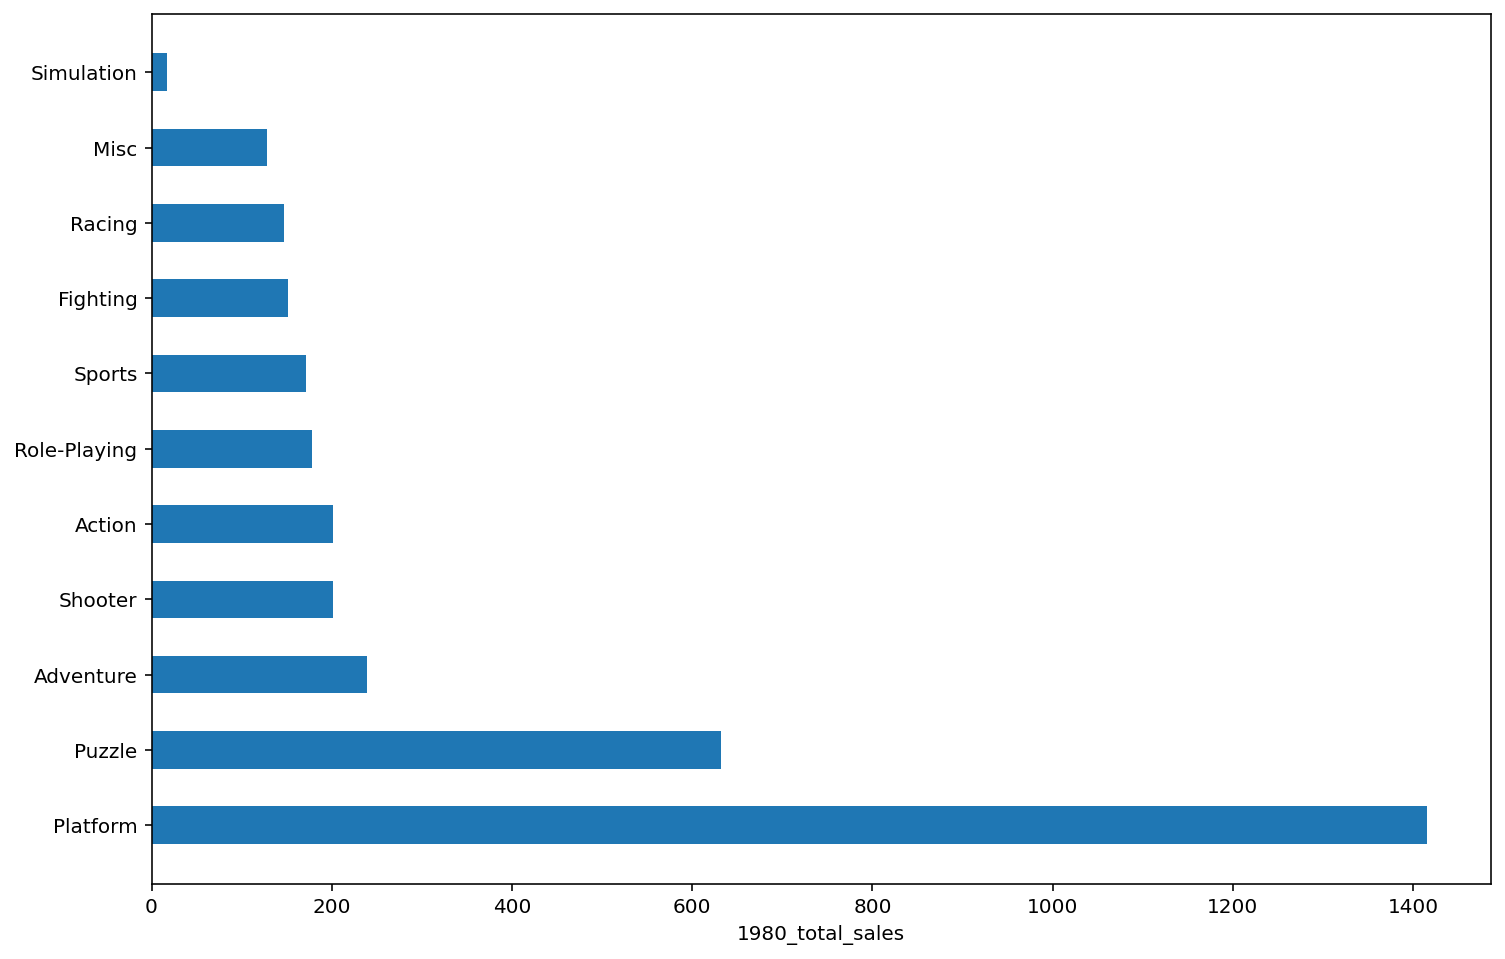

In [ ]:
# 1980년대 장르별 평균 매출액 bar chart
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ypos = np.arange(11)
rects = plt.barh(ypos, mean_1980_genre['Total_Sales_1980'], align='center', height=0.5)
plt.yticks(ypos, mean_1980_genre['Genre'])

plt.xlabel('1980_total_sales')
plt.show()

In [ ]:
# 연도별 장르별 평균매출액 pivot
df_pivot_1980_YGT = Group_genre_1980_YGT.pivot('Genre', 'Year', 'Total_Sales')
df_pivot_1980_YGT

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989
Genre,,,,,,,,,,
Action,34.0,938.720000,36.111111,40.857143,185.000000,176.00,229.00,55.50,87.0,232.500000
Adventure,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,438.00,NaN,NaN
Fighting,77.0,NaN,NaN,NaN,NaN,105.00,NaN,271.00,NaN,NaN
Misc,67.5,NaN,87.000000,214.000000,145.000000,NaN,NaN,NaN,NaN,128.000000
Platform,NaN,230.666667,100.600000,138.600000,69.000000,1079.25,156.50,87.00,10188.5,688.666667
Puzzle,NaN,112.500000,334.666667,78.000000,104.666667,80.25,NaN,NaN,558.0,3153.800000
Racing,NaN,48.000000,78.500000,NaN,198.333333,NaN,196.00,NaN,214.0,NaN
Role-Playing,NaN,NaN,NaN,NaN,NaN,NaN,252.00,155.00,196.0,110.000000
Shooter,353.5,100.200000,76.200000,49.000000,1036.666667,100.00,97.25,34.50,51.0,119.000000


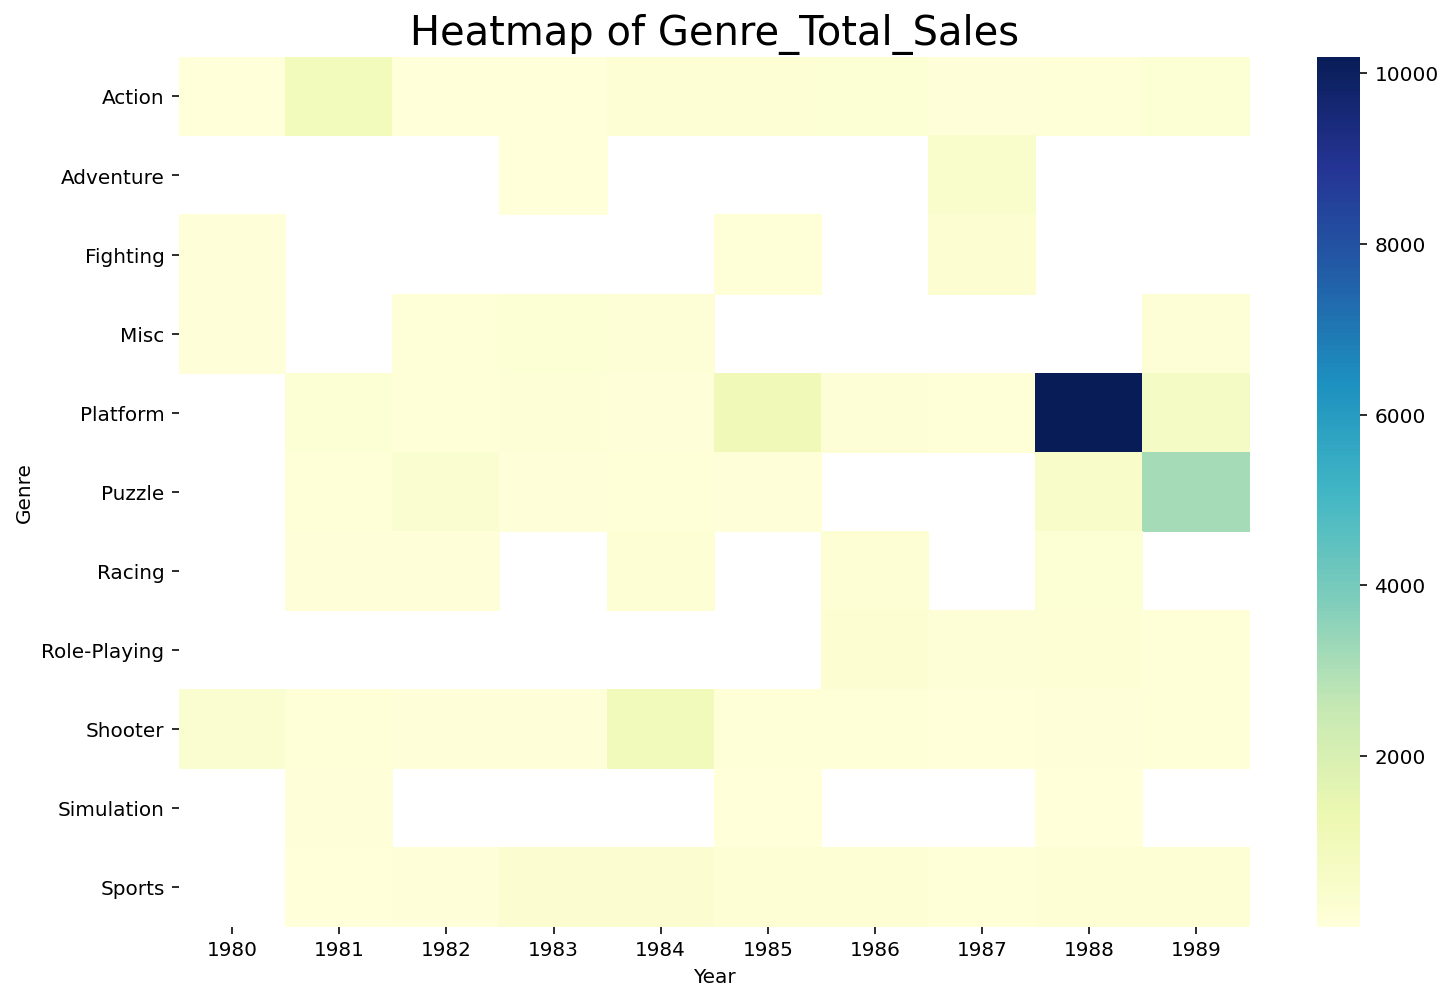

In [ ]:
# 1980년대 장르별 총 매출액 평균

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

sns.heatmap(df_pivot_1980_YGT, cmap='YlGnBu') 
plt.title('Heatmap of Genre_Total_Sales', fontsize=20)
plt.show()

In [ ]:
# 1990년대 출시한 게임
is_games_1990 = games_sort_year['Year'] >= 1990
games_1990 = games_sort_year[is_games_1990]
games_1990.drop(games_1990.loc[games_1990['Year'] >= 2000].index, inplace=True)
games_1990

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2543,1990,Role-Playing,8.0,0.0,303.0,1.0,312.0
5550,1990,Platform,68.0,10.0,39.0,0.0,117.0
10655,1990,Simulation,46.0,17.0,48.0,2.0,113.0
9393,1990,Sports,28.0,50.0,65.0,5.0,148.0
2519,1990,Puzzle,262.0,60.0,152.0,10.0,484.0
...,...,...,...,...,...,...,...
10413,1999,Simulation,1.0,1.0,0.0,0.0,2.0
6582,1999,Adventure,0.0,1.0,0.0,0.0,1.0
3863,1999,Shooter,78.0,28.0,7.0,2.0,115.0
15703,1999,Adventure,0.0,0.0,6.0,0.0,6.0


In [ ]:
# 연도, 장르별 매출액 평균 groupby
Group_genre_1990 = games_1990[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']].groupby([games_1990['Year'], games_1990['Genre']]).mean()
Group_genre_1990 = Group_genre_1990.reset_index()
Group_genre_1990

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1990,Action,142.333333,32.333333,33.666667,4.666667,213.000000
1,1990,Platform,471.333333,133.000000,142.666667,19.000000,766.000000
2,1990,Puzzle,156.500000,40.000000,96.500000,6.500000,299.500000
3,1990,Racing,155.000000,60.000000,74.000000,23.500000,312.500000
4,1990,Role-Playing,4.000000,0.000000,221.000000,1.000000,226.000000
...,...,...,...,...,...,...,...
110,1999,Role-Playing,52.093750,33.593750,56.281250,5.656250,147.625000
111,1999,Shooter,48.562500,23.312500,1.812500,2.750000,76.437500
112,1999,Simulation,17.050000,6.650000,30.600000,3.000000,57.300000
113,1999,Sports,24.338710,11.338710,11.016129,2.032258,48.725806


In [ ]:
# 1990년대 genre와 total 매출액
Group_genre_1990_YGT = Group_genre_1990[['Year', 'Genre', 'Total_Sales']]
Group_genre_1990_YGT

,Year,Genre,Total_Sales
0,1990,Action,213.000000
1,1990,Platform,766.000000
2,1990,Puzzle,299.500000
3,1990,Racing,312.500000
4,1990,Role-Playing,226.000000
...,...,...,...
110,1999,Role-Playing,147.625000
111,1999,Shooter,76.437500
112,1999,Simulation,57.300000
113,1999,Sports,48.725806


In [ ]:
# 1990년대 genre별 총 매출액 평균
mean_1990_genre = Group_genre_1990_YGT[['Genre', 'Total_Sales']]
mean_1990_genre = mean_1990_genre.groupby('Genre').mean().reset_index()
mean_1990_genre = mean_1990_genre.sort_values(by='Total_Sales', ascending=False)
mean_1990_genre = mean_1990_genre.rename({'Total_Sales':'Total_Sales_1990'}, axis='columns')
mean_1990_genre

,Genre,Total_Sales_1990
9,Simulation,3176.700727
0,Action,2607.602005
3,Misc,1922.162322
6,Racing,1887.248668
8,Shooter,804.761797
4,Platform,768.045131
2,Fighting,397.750757
7,Role-Playing,109.955079
10,Sports,81.940678
5,Puzzle,81.304695


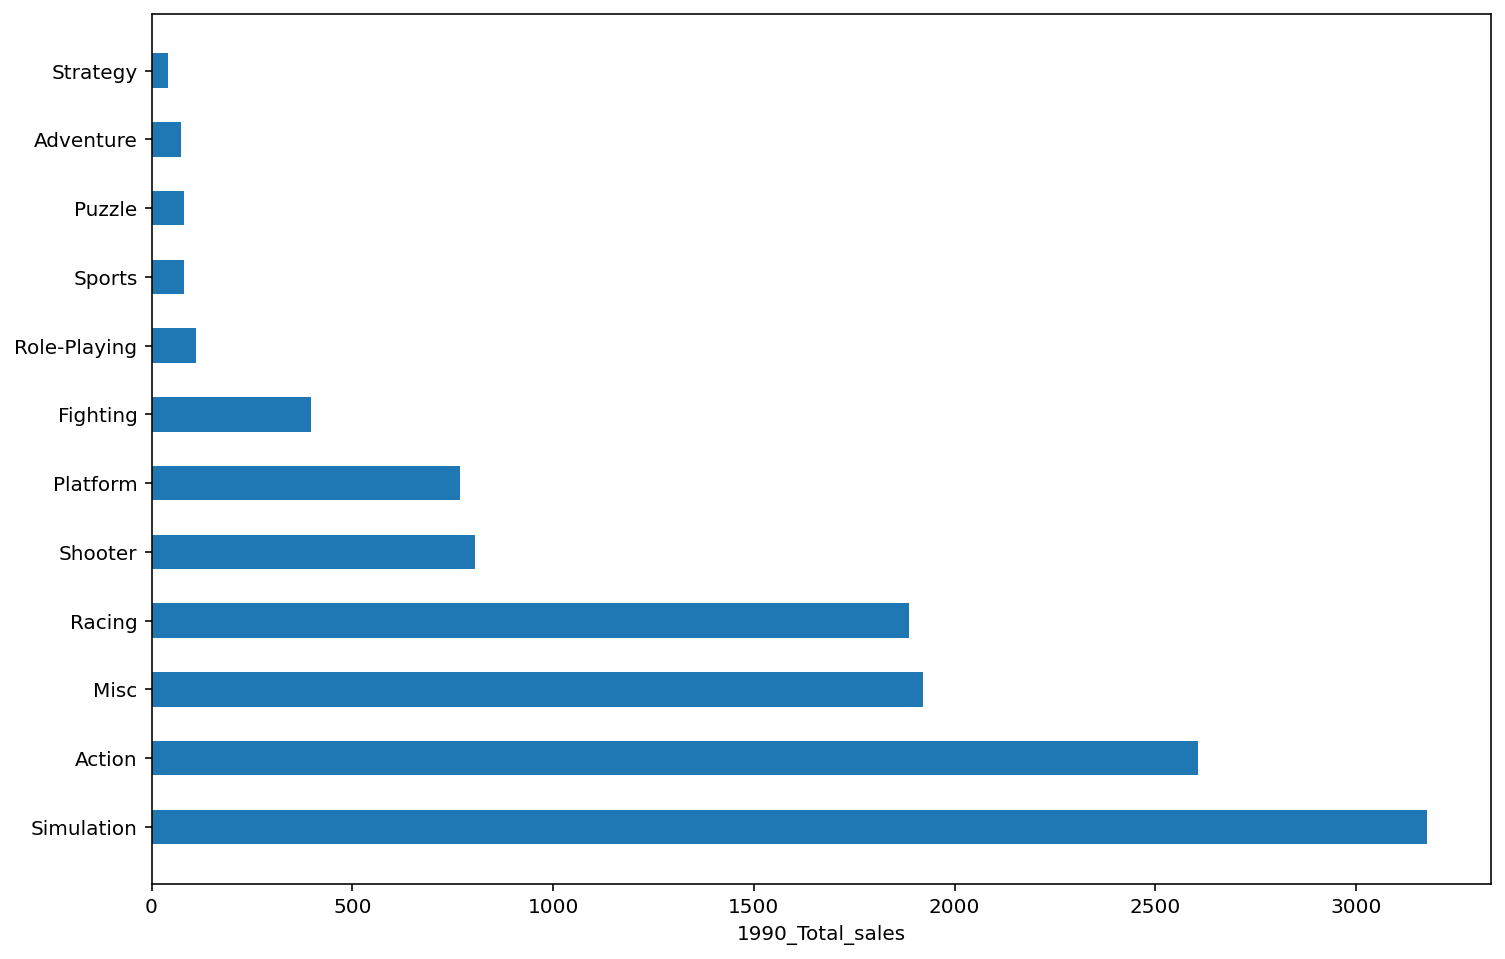

In [ ]:
# 1990년대 장르별 평균 매출액 bar chart
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ypos = np.arange(12)
rects = plt.barh(ypos, mean_1990_genre['Total_Sales_1990'], align='center', height=0.5)
plt.yticks(ypos, mean_1990_genre['Genre'])

plt.xlabel('1990_Total_sales')
plt.show()

In [ ]:
# 연도별 장르별 평균매출액 pivot
df_pivot_1990_YGT = Group_genre_1990_YGT.pivot('Genre', 'Year', 'Total_Sales')
df_pivot_1990_YGT

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
Genre,,,,,,,,,,
Action,213.000000,135.200000,384.000000,30.166667,38.750000,44.750000,6199.950000,89.000000,18716.613636,224.589744
Adventure,NaN,112.000000,306.000000,7.000000,93.500000,5.461538,24.588235,35.500000,39.304348,40.052632
Fighting,NaN,39.000000,217.571429,79.545455,38.500000,2394.827586,60.133333,613.285714,77.268293,59.625000
Misc,NaN,16000.000000,247.000000,10.000000,47.666667,29.045455,46.347826,380.500000,56.380952,482.520000
Platform,766.000000,127.166667,223.500000,169.818182,261.454545,128.384615,201.642857,2453.611111,2678.040000,670.833333
Puzzle,299.500000,81.000000,96.800000,105.666667,51.000000,22.416667,43.555556,41.928571,48.846154,22.333333
Racing,312.500000,114.000000,452.500000,18.000000,6524.000000,50.750000,132.619048,366.305556,55.791667,10846.020408
Role-Playing,226.000000,65.200000,137.200000,62.111111,41.941176,59.458333,157.107143,94.869565,108.038462,147.625000
Shooter,NaN,66.333333,9.333333,154.000000,75.454545,14.310345,30.000000,82.074074,6734.913043,76.437500


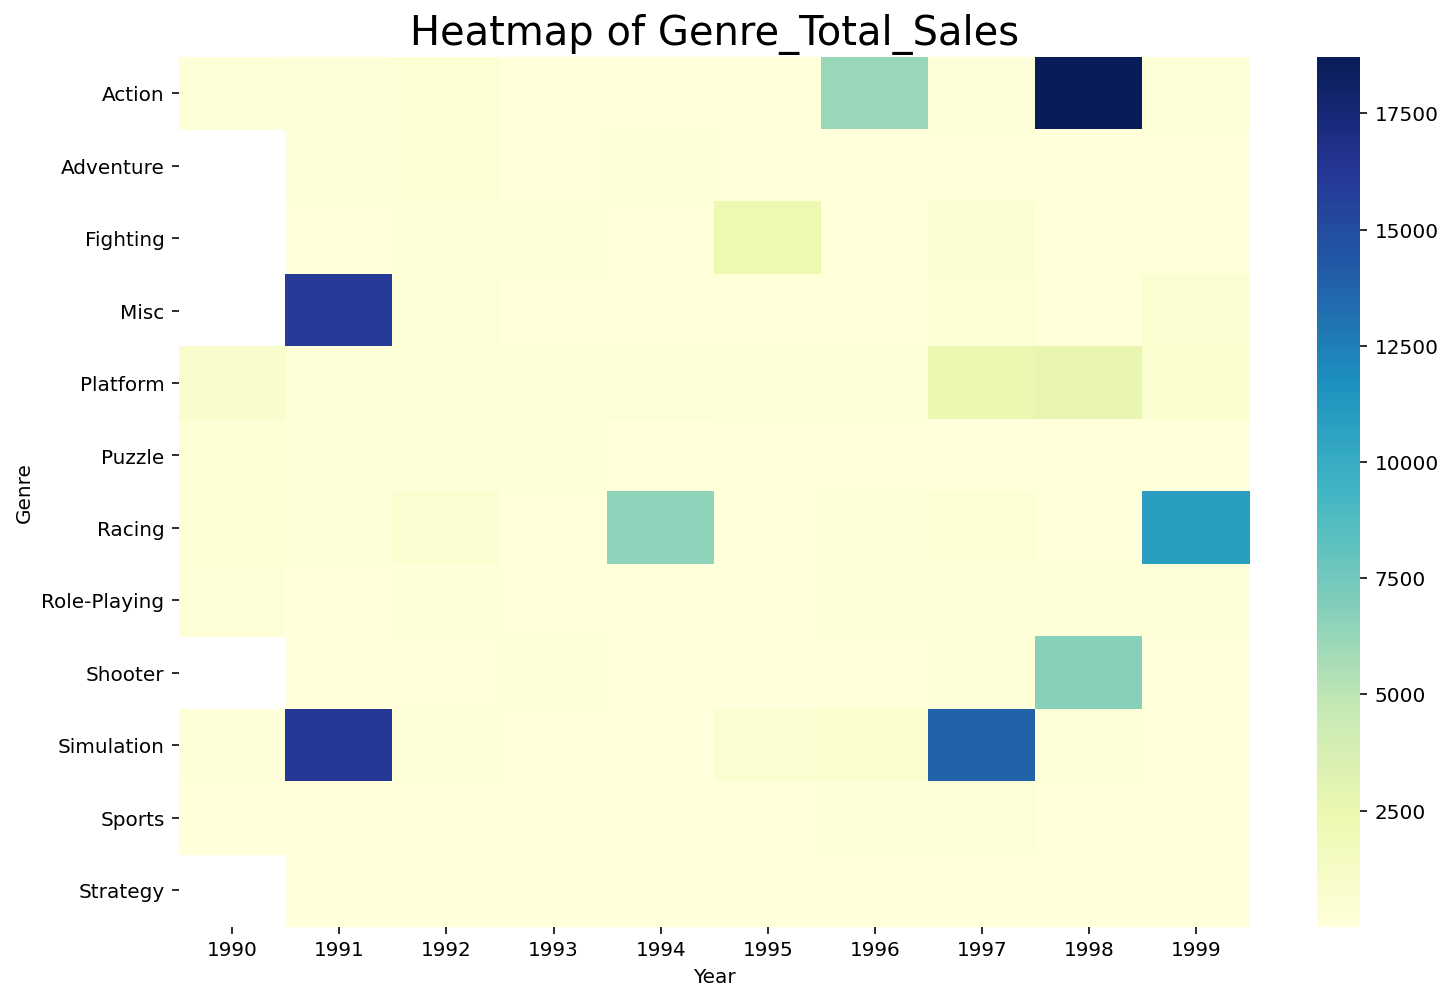

In [ ]:
# 1990년대 장르별 총 매출액 평균
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

sns.heatmap(df_pivot_1990_YGT, cmap='YlGnBu') 
plt.title('Heatmap of Genre_Total_Sales', fontsize=20)
plt.show()

In [ ]:
# 2000년대 출시한 게임
is_games_2000 = games_sort_year['Year'] >= 2000
games_2000 = games_sort_year[is_games_2000]
games_2000.drop(games_2000.loc[games_2000['Year'] >= 2010].index, inplace=True)
games_2000

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2504,2000,Action,113.0,38.0,2.0,3.0,156.0
8858,2000,Platform,193.0,158.0,0.0,19.0,370.0
2849,2000,Fighting,32.0,25.0,20.0,8.0,85.0
9371,2000,Simulation,7.0,5.0,0.0,1.0,13.0
9112,2000,Racing,30.0,20.0,0.0,3.0,53.0
...,...,...,...,...,...,...,...
4100,2009,Adventure,10.0,12.0,0.0,2.0,24.0
4137,2009,Action,0.0,0.0,26.0,0.0,26.0
16085,2009,Action,0.0,0.0,3.0,0.0,3.0
7939,2009,Sports,0.0,0.0,8.0,0.0,8.0


In [ ]:
# 연도, 장르별 매출액 평균 groupby
Group_genre_2000 = games_2000[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']].groupby([games_2000['Year'], games_2000['Genre']]).mean()
Group_genre_2000 = Group_genre_2000.reset_index()
Group_genre_2000

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,2000,Action,41.209302,25.162791,8.697674,3.744186,78.813953
1,2000,Adventure,6.312500,4.312500,6.937500,0.937500,18.500000
2,2000,Fighting,33.413793,9327.448276,10.517241,4.172414,9375.551724
3,2000,Misc,635.400000,24.550000,13.850000,3.650000,677.450000
4,2000,Platform,34.000000,20.043478,11.130435,4.217391,69.391304
...,...,...,...,...,...,...,...
115,2009,Role-Playing,96.135922,8.116505,16.572816,3.368932,124.194175
116,2009,Shooter,42.846154,177.032967,1.230769,97.274725,318.384615
117,2009,Simulation,794.455285,9.463415,0.772358,18.934959,823.626016
118,2009,Sports,38.842391,131.559783,5.331522,8.228261,183.961957


In [ ]:
# 2000년대 genre와 total 매출액
Group_genre_2000_YGT = Group_genre_2000[['Year', 'Genre', 'Total_Sales']]
Group_genre_2000_YGT

,Year,Genre,Total_Sales
0,2000,Action,78.813953
1,2000,Adventure,18.500000
2,2000,Fighting,9375.551724
3,2000,Misc,677.450000
4,2000,Platform,69.391304
...,...,...,...
115,2009,Role-Playing,124.194175
116,2009,Shooter,318.384615
117,2009,Simulation,823.626016
118,2009,Sports,183.961957


In [ ]:
# 2000년대 genre별 총 매출액 평균
mean_2000_genre = Group_genre_2000_YGT[['Genre', 'Total_Sales']]
mean_2000_genre = mean_2000_genre.groupby('Genre').mean().reset_index()
mean_2000_genre = mean_2000_genre.sort_values(by='Total_Sales', ascending=False)
mean_2000_genre = mean_2000_genre.rename({'Total_Sales':'Total_Sales_2000'}, axis='columns')
mean_2000_genre

,Genre,Total_Sales_2000
7,Role-Playing,2488.114107
3,Misc,1153.686569
2,Fighting,1008.357309
9,Simulation,974.193901
4,Platform,932.680654
0,Action,581.741893
6,Racing,577.824563
10,Sports,418.769336
8,Shooter,288.575670
1,Adventure,177.439364


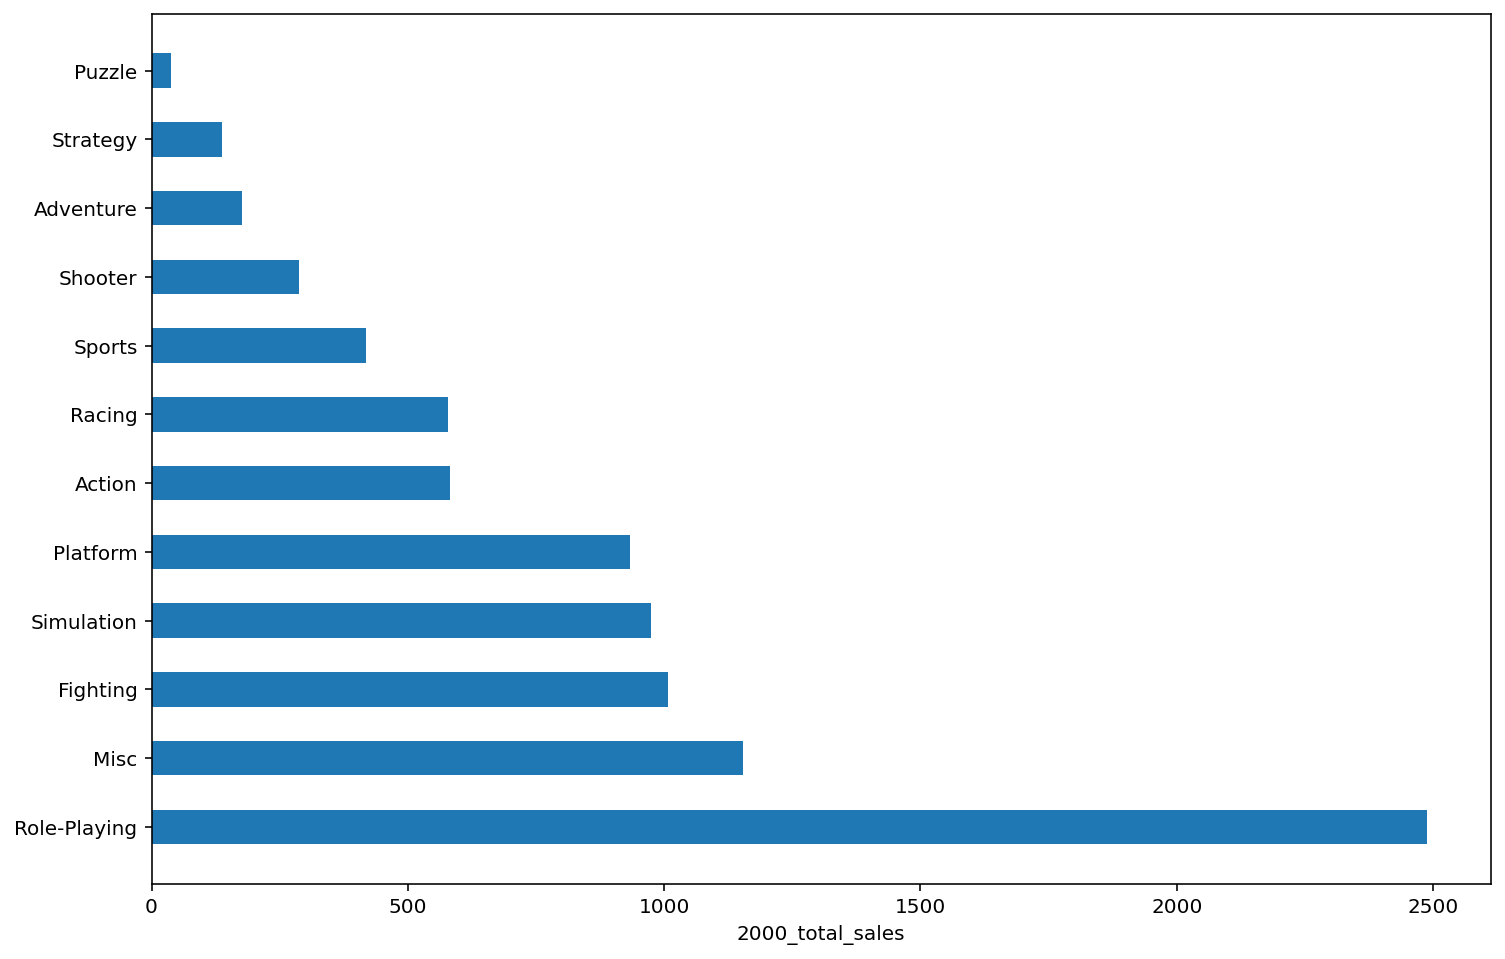

In [ ]:
# 2000년대 장르별 평균 매출액 bar chart
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ypos = np.arange(12)
rects = plt.barh(ypos, mean_2000_genre['Total_Sales_2000'], align='center', height=0.5)
plt.yticks(ypos, mean_2000_genre['Genre'])

plt.xlabel('2000_total_sales')
plt.show()

In [ ]:
# 연도별 장르별 평균매출액 pivot
df_pivot_2000_YGT = Group_genre_2000_YGT.pivot('Genre', 'Year', 'Total_Sales')
df_pivot_2000_YGT

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
Genre,,,,,,,,,,
Action,78.813953,540.196970,2212.248000,172.145833,412.744000,65.364583,242.554348,50.471429,1047.662100,995.217712
Adventure,18.500000,44.800000,417.048780,17.666667,22.236842,829.428571,100.633803,124.285714,15.006024,184.787234
Fighting,9375.551724,100.555556,46.148148,54.068182,42.974359,45.767442,222.690909,35.260000,62.122807,98.433962
Misc,677.450000,1523.846154,923.177778,2760.509434,38.955224,90.609091,153.376147,4471.840000,174.304762,722.797101
Platform,69.391304,556.348837,59.675325,6919.344828,71.727273,222.841463,92.037037,988.904762,57.500000,289.035714
Puzzle,31.916667,52.933333,26.650000,24.428571,33.640000,63.312500,25.690476,36.584615,24.265625,50.974684
Racing,1069.255814,2246.563380,29.271845,139.568807,664.857143,125.168831,45.413333,212.952381,915.109756,330.084337
Role-Playing,20641.586207,53.707317,83.500000,2353.625000,123.233333,800.338028,436.648148,139.621359,124.687500,124.194175
Shooter,35.842105,68.916667,61.076923,1324.150685,76.034091,43.302083,200.434783,131.976190,625.638554,318.384615


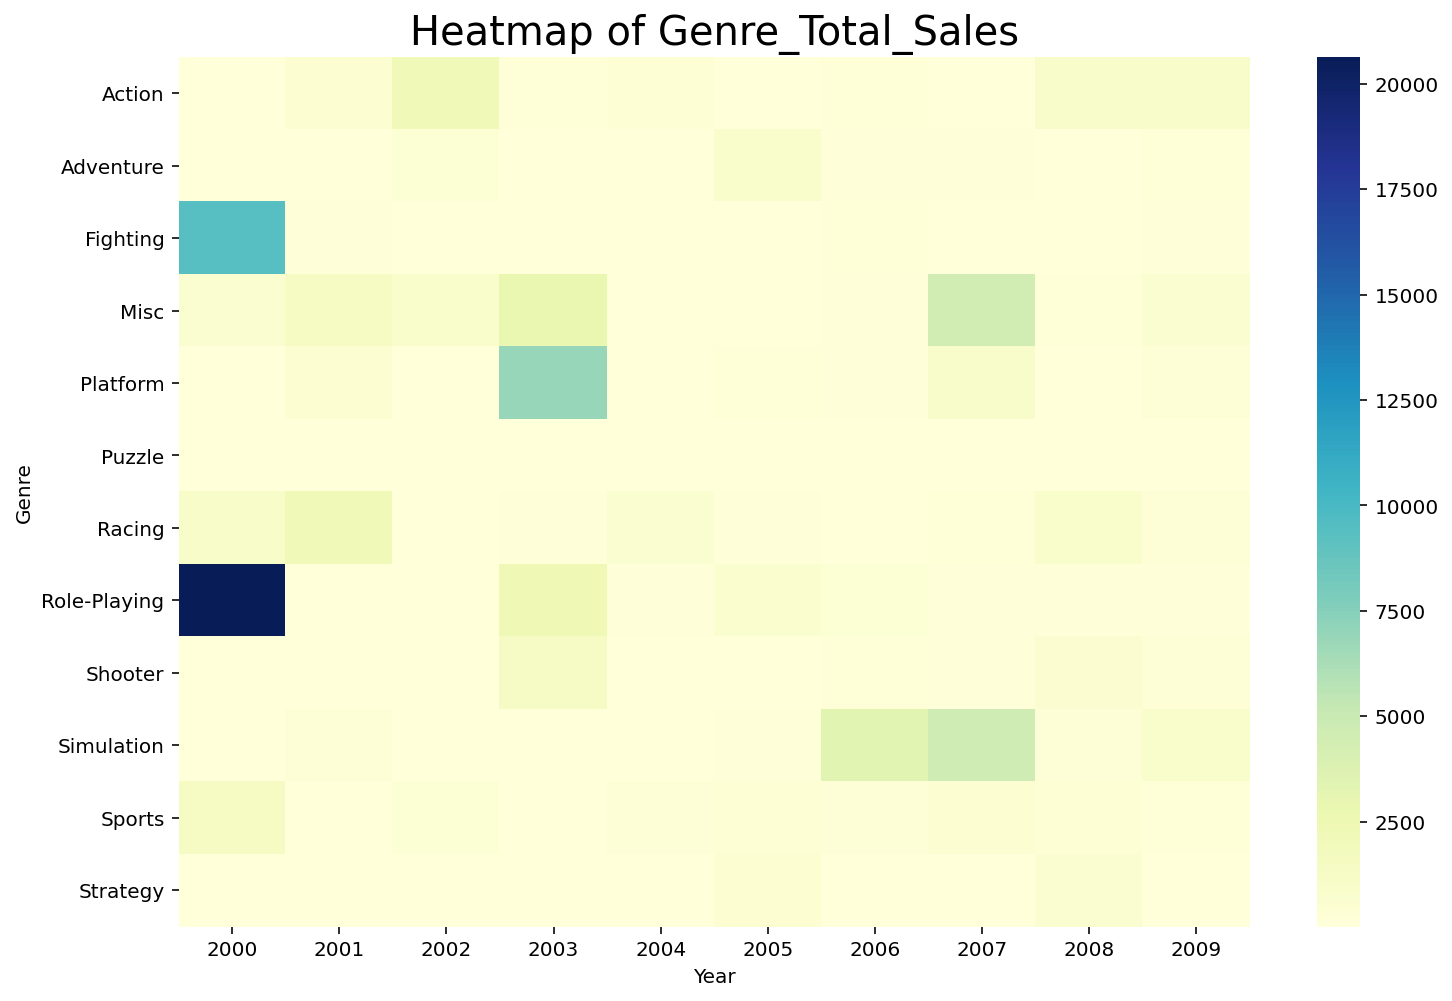

In [ ]:
# 2000년대 장르별 총 매출액 평균
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

sns.heatmap(df_pivot_2000_YGT, cmap='YlGnBu') 
plt.title('Heatmap of Genre_Total_Sales', fontsize=20)
plt.show()

In [ ]:
# 2010년대 출시한 게임 + 2020 출시한 게임 1
is_games_2010 = games_sort_year['Year'] >= 2010
games_2010 = games_sort_year[is_games_2010]
games_2010

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
5545,2010,Action,274.0,136.0,12.0,63.0,485.0
13261,2010,Sports,0.0,14.0,0.0,4.0,18.0
13855,2010,Role-Playing,9.0,0.0,4.0,1.0,14.0
12449,2010,Action,41.0,29.0,0.0,7.0,77.0
3429,2010,Sports,0.0,9.0,0.0,1.0,10.0
...,...,...,...,...,...,...,...
7130,2016,Sports,0.0,0.0,11.0,0.0,11.0
10108,2017,Role-Playing,0.0,0.0,3.0,0.0,3.0
5311,2017,Action,0.0,0.0,1.0,0.0,1.0
15234,2017,Role-Playing,0.0,0.0,1.0,0.0,1.0


In [ ]:
# 연도, 장르별 매출액 평균 groupby
Group_genre_2010 = games_2010[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']].groupby([games_2010['Year'], games_2010['Genre']]).mean()
Group_genre_2010 = Group_genre_2010.reset_index()
Group_genre_2010

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,2010,Action,26.690265,33.508850,3.796460,5.685841,69.681416
1,2010,Adventure,4.117647,3.424837,15.405229,0.947712,23.895425
2,2010,Fighting,18.650000,10.550000,3.800000,4.200000,37.200000
3,2010,Misc,206.500000,371.610000,2.100000,33.705000,613.915000
4,2010,Platform,55.354839,27.580645,11.870968,8.354839,103.161290
...,...,...,...,...,...,...,...
81,2016,Sports,12.026316,19.368421,2.052632,5.052632,38.500000
82,2016,Strategy,1.100000,3.200000,0.500000,0.400000,5.200000
83,2017,Action,0.000000,0.000000,1.000000,0.000000,1.000000
84,2017,Role-Playing,0.000000,0.000000,2.000000,0.000000,2.000000


In [ ]:
# 2010년대 genre와 total 매출액
Group_genre_2010_YGT = Group_genre_2010[['Year', 'Genre', 'Total_Sales']]
Group_genre_2010_YGT

,Year,Genre,Total_Sales
0,2010,Action,69.681416
1,2010,Adventure,23.895425
2,2010,Fighting,37.200000
3,2010,Misc,613.915000
4,2010,Platform,103.161290
...,...,...,...
81,2016,Sports,38.500000
82,2016,Strategy,5.200000
83,2017,Action,1.000000
84,2017,Role-Playing,2.000000


In [ ]:
# 2010년대 genre별 총 매출액 평균
mean_2010_genre = Group_genre_2010_YGT[['Genre', 'Total_Sales']]
mean_2010_genre = mean_2010_genre.groupby('Genre').mean().reset_index()
mean_2010_genre = mean_2010_genre.sort_values(by='Total_Sales', ascending=False)
mean_2010_genre = mean_2010_genre.rename({'Total_Sales':'Total_Sales_2010'}, axis='columns')
mean_2010_genre

,Genre,Total_Sales_2010
6,Racing,3567.141614
8,Shooter,2090.290670
11,Strategy,1558.058815
4,Platform,903.709899
2,Fighting,717.555854
10,Sports,623.290199
7,Role-Playing,571.748671
0,Action,464.714281
3,Misc,144.703013
5,Puzzle,58.526698


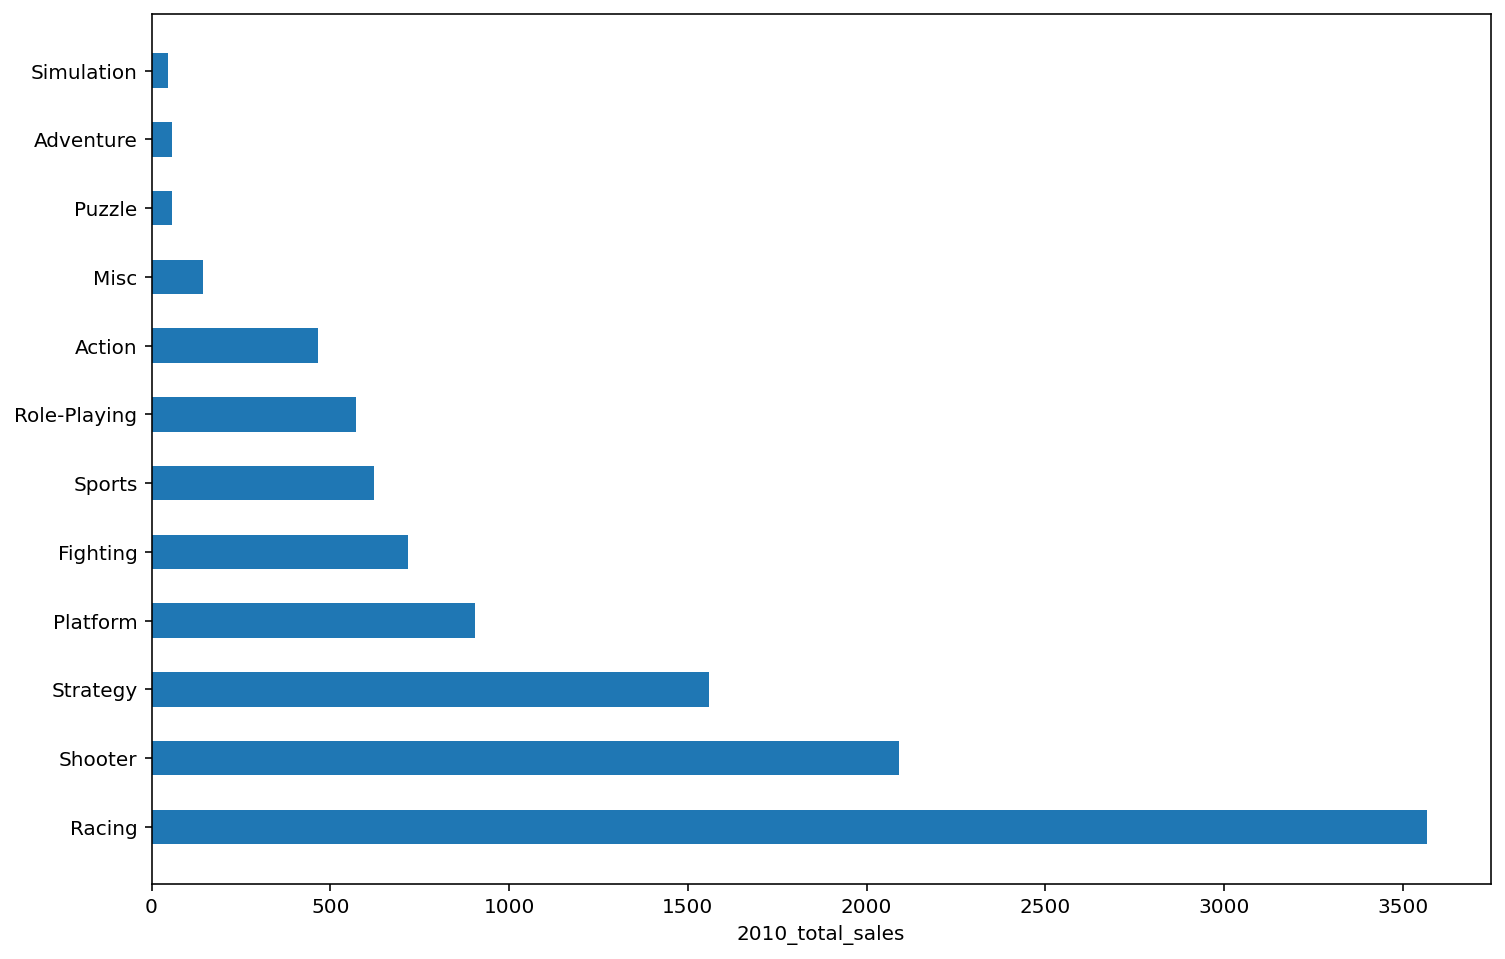

In [ ]:
# 2010년대 장르별 평균 매출액 bar chart

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ypos = np.arange(12)
rects = plt.barh(ypos, mean_2010_genre['Total_Sales_2010'], align='center', height=0.5)
plt.yticks(ypos, mean_2010_genre['Genre'])

plt.xlabel('2010_total_sales')
plt.show()

In [ ]:
# 연도별 장르별 평균매출액 pivot

df_pivot_2010_YGT = Group_genre_2010_YGT.pivot('Genre', 'Year', 'Total_Sales')
df_pivot_2010_YGT

Year,2010,2011,2012,2013,2014,2015,2016,2017,2020
Genre,,,,,,,,,
Action,69.681416,250.527197,2440.163498,584.351351,106.967742,248.209486,16.813559,1.0,NaN
Adventure,23.895425,14.841121,10.350877,110.966667,141.386667,90.547170,5.424242,NaN,NaN
Fighting,37.200000,412.285714,3272.620690,36.150000,1200.086957,37.047619,27.500000,NaN,NaN
Misc,613.915000,183.404372,60.342105,61.095238,57.878049,29.897436,6.388889,NaN,NaN
Platform,103.161290,76.000000,168.545455,5254.405405,88.700000,614.357143,20.800000,NaN,NaN
Puzzle,24.777778,244.302326,15.818182,33.333333,21.428571,11.500000,NaN,NaN,NaN
Racing,61.280702,54.625000,48.100000,24694.062500,61.888889,41.684211,8.350000,NaN,NaN
Role-Playing,437.252427,56.126316,1496.423077,643.328571,162.033333,1610.025641,166.800000,2.0,NaN
Shooter,342.395062,4635.340426,318.333333,6137.203390,2947.510638,194.470588,56.781250,NaN,NaN


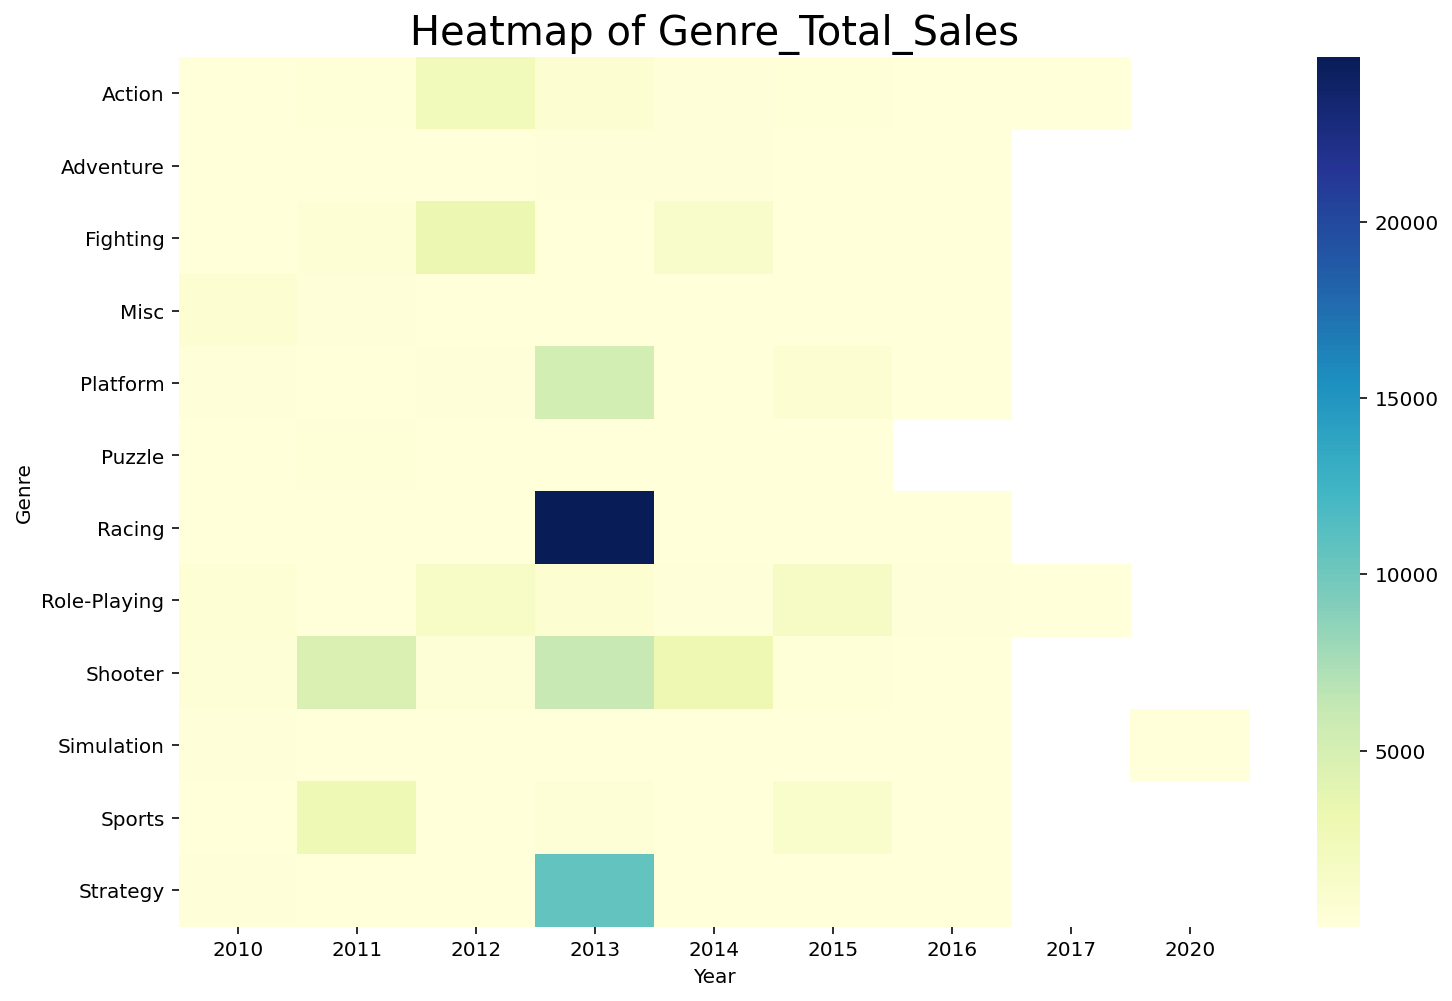

In [ ]:
# 2010년대 장르별 총 매출액 평균

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

sns.heatmap(df_pivot_2010_YGT, cmap='YlGnBu') 
plt.title('Heatmap of Genre_Total_Sales', fontsize=20)
plt.show()

In [ ]:
# 각 연대별 장르별 Total_Sales 평균
merge = pd.merge(mean_1980_genre, mean_1990_genre, how='right')
merge = pd.merge(merge, mean_2000_genre)
Genre_total_year = pd.merge(merge, mean_2010_genre)
Genre_total_year = Genre_total_year.round(2)
Genre_total_year = Genre_total_year.fillna(0)
Genre_total_year

,Genre,Total_Sales_1980,Total_Sales_1990,Total_Sales_2000,Total_Sales_2010
0,Simulation,17.00,3176.70,974.19,46.88
1,Action,201.47,2607.60,581.74,464.71
2,Misc,128.30,1922.16,1153.69,144.70
3,Racing,146.97,1887.25,577.82,3567.14
4,Shooter,201.73,804.76,288.58,2090.29
5,Platform,1415.42,768.05,932.68,903.71
6,Fighting,151.00,397.75,1008.36,717.56
7,Role-Playing,178.25,109.96,2488.11,571.75
8,Sports,171.82,81.94,418.77,623.29
9,Puzzle,631.70,81.30,37.04,58.53


In [ ]:
# 게임을 가장 많이 출시한 연도

print('1980년대 출시한 게임 수 : ', len(games_1980))
print('1990년대 출시한 게임 수 : ', len(games_1990))
print('2000년대 출시한 게임 수 : ', len(games_2000))
print('2010년대 출시한 게임 수 : ', len(games_2010))

# 2000년대 출시한 게임의 수가 가장 많았다.

1980년대 출시한 게임 수 :  204
1990년대 출시한 게임 수 :  1764
2000년대 출시한 게임 수 :  9150
2010년대 출시한 게임 수 :  5120


In [ ]:
df = pd.DataFrame({'Year' : ['1980', '1990', '2000', '2010'], 'Counts of Games' : [204, 1764, 9150, 5120]})
df

,Year,Counts of Games
0,1980,204
1,1990,1764
2,2000,9150
3,2010,5120


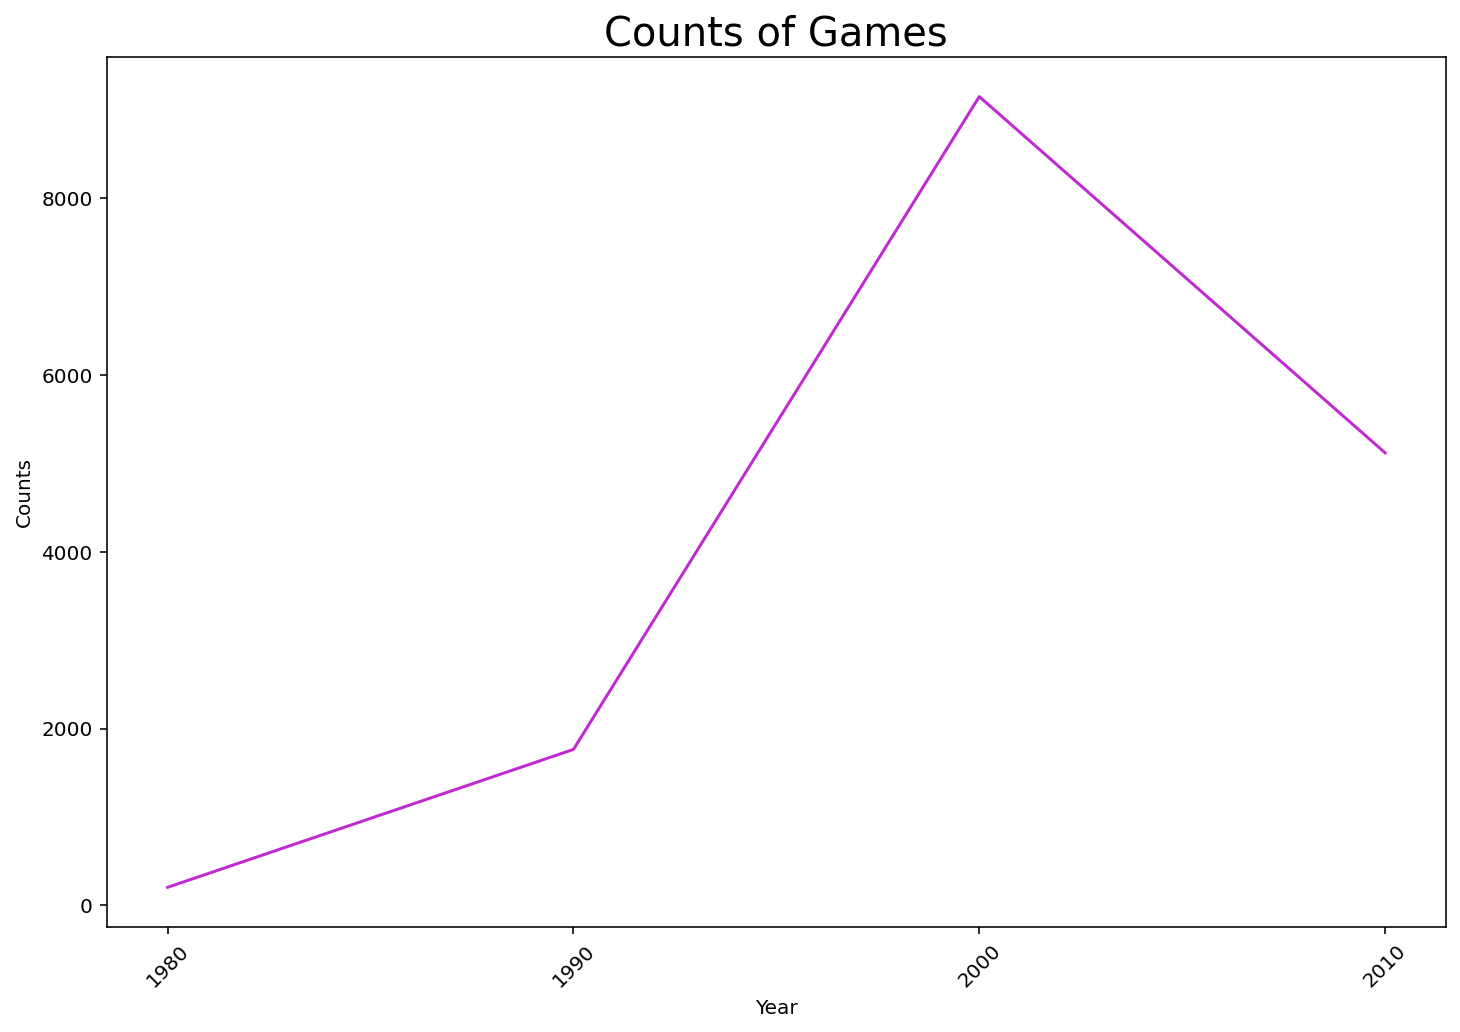

In [ ]:
# 1980 ~ 2010 년대별 출시한 게임 수

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(df['Year'],df['Counts of Games'],color='#c02ad1') ## 선그래프 생성

plt.xlabel('Year')
plt.ylabel('Counts')
plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 45도 회전 
plt.title('Counts of Games',fontsize=20) ## 타이틀 설정
plt.show()

In [ ]:
# 매출이 높은 게임에 대한 분석 및 시각화 프로세스

In [ ]:
# Total_Sales 기준으로 내림차순 정렬
# 총 매출액 기준 Top 100 게임
games_sort = games.sort_values(by='Total_Sales', ascending=False)
top100_games = games_sort[0:100].reset_index(drop=True)
top100_games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,820000.0,189.0,145.0,16.0,820350.0
1,Super Mario Bros. 3,GBA,2003,Platform,Nintendo,586000.0,125.0,83.0,20.0,586228.0
2,Final Fantasy IX,PS,2000,Role-Playing,SquareSoft,162.0,77.0,556000.0,14.0,556253.0
3,Crash Team Racing,PS,1999,Racing,Sony Computer Entertainment,514000.0,157.0,44.0,21.0,514222.0
4,Assassin's Creed III,PS3,2012,Action,Ubisoft,264.0,512000.0,16.0,114.0,512394.0
...,...,...,...,...,...,...,...,...,...,...
95,Animal Planet: Vet Life,Wii,2009,Simulation,Activision,18000.0,0.0,0.0,1.0,18001.0
96,King of Clubs: Mini Golf,Wii,2008,Sports,Oxygen Interactive,18000.0,0.0,0.0,1.0,18001.0
97,Shin Megami Tensei: Devil Summoner - Raidou Ku...,PS2,2006,Role-Playing,Tecmo Koei,0.0,0.0,18000.0,0.0,18000.0
98,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,418.0,26.0,1.0,16000.0,16445.0


In [ ]:
# 총 매출에서 각 지역별 매출이 차지하는 비율 (단위 : 만)
top100_total = top100_games['Total_Sales'].sum()
top100_NA = top100_games['NA_Sales'].sum()
top100_EU = top100_games['EU_Sales'].sum()
top100_JP = top100_games['JP_Sales'].sum()
top100_Other = top100_games['Other_Sales'].sum()
print('총 매출 top100 전체지역 매출총액 : ', top100_total)
print('총 매출 top100 북미지역 매출총액 : ', top100_NA)
print('총 매출 top100 유럽지역 매출총액 : ', top100_EU)
print('총 매출 top100 일본지역 매출총액 : ', top100_JP)
print('총 매출 top100 기타지역 매출총액 : ', top100_Other, '\n')

print('북미지역 매출 비율 : ', (top100_NA / top100_total)*100)
print('북미지역 매출 비율 : ', (top100_EU / top100_total)*100)
print('북미지역 매출 비율 : ', (top100_JP / top100_total)*100)
print('북미지역 매출 비율 : ', (top100_Other / top100_total)*100)

총 매출 top100 전체지역 매출총액 :  10680864.0
총 매출 top100 북미지역 매출총액 :  6086507.0
총 매출 top100 유럽지역 매출총액 :  2708556.0
총 매출 top100 일본지역 매출총액 :  1348877.0
총 매출 top100 기타지역 매출총액 :  536924.0 

북미지역 매출 비율 :  56.98515588252037
북미지역 매출 비율 :  25.35895972460655
북미지역 매출 비율 :  12.628912792073749
북미지역 매출 비율 :  5.026971600799336


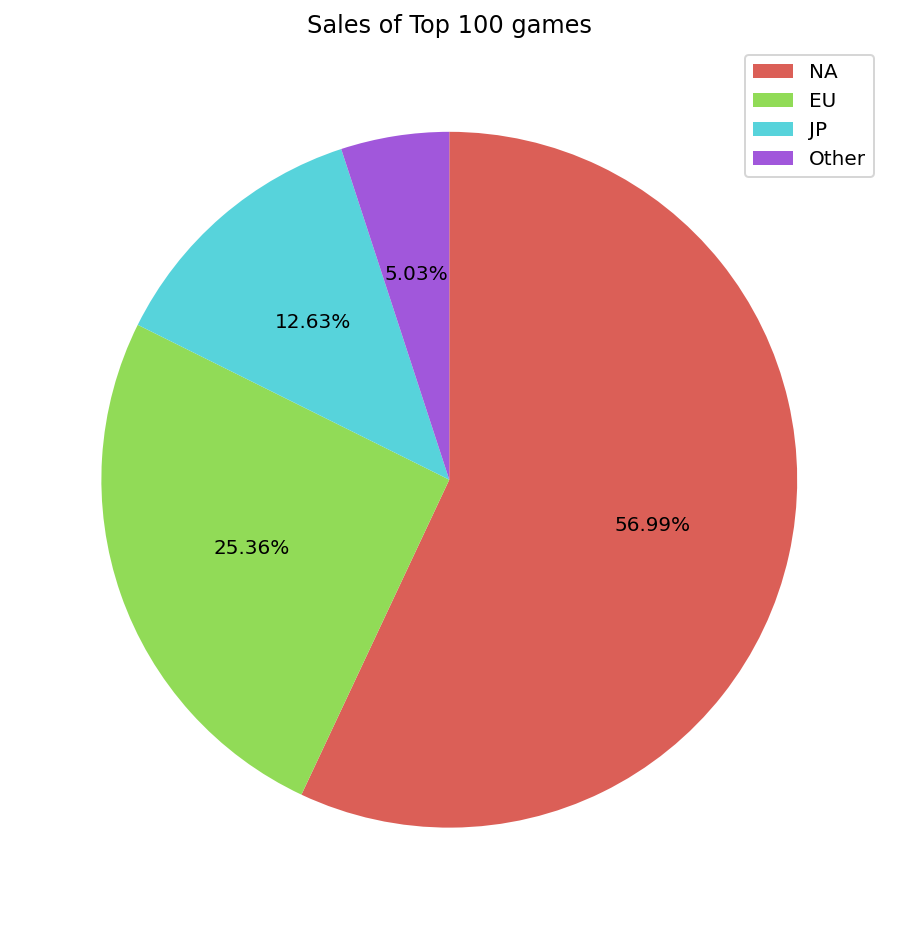

In [ ]:
data = [6086507.0, 2708556.0, 1348877.0, 536924.0]
categories = ['NA', 'EU', 'JP', 'Other']

labels = ['NA', 'EU', 'JP', 'Other'] ## 라벨
frequency = [6086507.0, 2708556.0, 1348877.0, 536924.0] ## 매출
 
colors = sns.color_palette('hls',len(labels)) ## 라벨의 개수 만큼 색상 리스트 생성 
 
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정

 
pie = ax.pie(frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       colors = colors ## 색상 지정
       )
plt.title('Sales of Top 100 games')
plt.legend(pie[0],labels) ## 범례 표시
plt.show()

In [ ]:
# 매출액 top100 게임들중 2010년 이후 출시된 게임

is_recent = top100_games['Year'] >= 2010
top100_recent = top100_games[is_recent]
top100_recent

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
4,Assassin's Creed III,PS3,2012,Action,Ubisoft,264.0,512000.0,16.0,114.0,512394.0
5,Battlefield 3,X360,2011,Shooter,Electronic Arts,446.0,426000.0,6.0,69.0,426521.0
7,Call of Duty: Ghosts,PS4,2013,Shooter,Activision,356000.0,142.0,5.0,38.0,356185.0
9,NBA 2K12,PS3,2011,Sports,Take-Two Interactive,322000.0,27.0,5.0,18.0,322050.0
11,Forza Motorsport 5,XOne,2013,Racing,Microsoft Game Studios,242000.0,78.0,1.0,17.0,242096.0
14,StarCraft II: Heart of the Swarm,PC,2013,Strategy,Activision,164000.0,65.0,0.0,38000.0,202065.0
19,Destiny,PS3,2014,Shooter,Activision,67.0,132000.0,12.0,27.0,132106.0
21,New Super Luigi U,WiiU,2013,Platform,Nintendo,127.0,124000.0,18.0,16.0,124161.0
23,The Witcher 3: Wild Hunt,PS4,2015,Role-Playing,Namco Bandai Games,96.0,200.0,21.0,112000.0,112317.0
24,Kingdoms of Amalur: Reckoning,X360,2012,Role-Playing,Electronic Arts,110000.0,25.0,1.0,7.0,110033.0


In [ ]:
# 총매출 top100안에 들어간 제작사
top100_games['Publisher'].value_counts()

Electronic Arts                           15
Nintendo                                   8
Activision                                 7
Ubisoft                                    5
THQ                                        5
Sony Computer Entertainment                5
Take-Two Interactive                       5
Namco Bandai Games                         5
Sega                                       5
Tecmo Koei                                 3
Microsoft Game Studios                     3
Capcom                                     3
505 Games                                  2
Konami Digital Entertainment               2
Midway Games                               2
Warner Bros. Interactive Entertainment     2
BMG Interactive Entertainment              1
Virgin Interactive                         1
Atari                                      1
Zoo Digital Publishing                     1
Activision Value                           1
Taito                                      1
Psygnosis 

In [ ]:
# 총매출 Top100에 많이 들어간 제작사 'Electronic Arts'

is_Electronic_Arts = top100_games['Publisher'] == 'Electronic Arts'
Electronic_Arts = top100_games[is_Electronic_Arts]
Electronic_Arts = Electronic_Arts.reset_index(drop=True)
Electronic_Arts

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Battlefield 3,X360,2011,Shooter,Electronic Arts,446.0,426000.0,6.0,69.0,426521.0
1,Harry Potter and the Chamber of Secrets,GBA,2002,Action,Electronic Arts,242000.0,64.0,5.0,9.0,242078.0
2,Smarty Pants,Wii,2007,Misc,Electronic Arts,53.0,152000.0,0.0,16.0,152069.0
3,Madden NFL 2001,N64,2000,Sports,Electronic Arts,120000.0,3.0,0.0,1.0,120004.0
4,Kingdoms of Amalur: Reckoning,X360,2012,Role-Playing,Electronic Arts,110000.0,25.0,1.0,7.0,110033.0
5,Need for Speed Rivals,XOne,2013,Racing,Electronic Arts,90000.0,17.0,0.0,5.0,90022.0
6,Need For Speed: Undercover,PSP,2008,Racing,Electronic Arts,23.0,64000.0,3.0,19.0,64045.0
7,Need for Speed Rivals,PS3,2013,Racing,Electronic Arts,33.0,74.0,5.0,62000.0,62112.0
8,Madden NFL 16,PS4,2015,Sports,Electronic Arts,233.0,60000.0,0.0,59.0,60292.0
9,Littlest Pet Shop: City Friends,DS,2009,Simulation,Electronic Arts,58000.0,0.0,0.0,2.0,58002.0


In [ ]:
# 총매출 Top100에 많이 들어간 제작사 'Nintendo'
is_Nintendo = top100_games['Publisher'] == 'Nintendo'
Nintendo = top100_games[is_Nintendo]
Nintendo = Nintendo.reset_index(drop=True)
Nintendo

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,820000.0,189.0,145.0,16.0,820350.0
1,Super Mario Bros. 3,GBA,2003,Platform,Nintendo,586000.0,125.0,83.0,20.0,586228.0
2,New Super Luigi U,WiiU,2013,Platform,Nintendo,127.0,124000.0,18.0,16.0,124161.0
3,Kirby's Dream Collection: Special Edition,Wii,2012,Action,Nintendo,34.0,0.0,66000.0,2.0,66036.0
4,Final Fantasy IV Advance,GBA,2005,Role-Playing,Nintendo,54000.0,10.0,22.0,1.0,54033.0
5,Super Mario Bros. 2,NES,1988,Platform,Nintendo,539.0,118.0,70.0,38000.0,38727.0
6,Trace Memory,DS,2005,Adventure,Nintendo,30000.0,1.0,12.0,1.0,30014.0
7,Eyeshield 21: Max Devil Power,DS,2006,Role-Playing,Nintendo,0.0,0.0,24000.0,0.0,24000.0


In [ ]:
# 총매출 Top100에 많이 들어간 제작사 'Activision'
is_Activision = top100_games['Publisher'] == 'Activision'
Activision = top100_games[is_Activision]
Activision = Activision.reset_index(drop=True)
Activision

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Guitar Hero II,X360,2007,Misc,Activision,402000.0,2.0,0.0,17.0,402019.0
1,Call of Duty: Ghosts,PS4,2013,Shooter,Activision,356000.0,142.0,5.0,38.0,356185.0
2,StarCraft II: Heart of the Swarm,PC,2013,Strategy,Activision,164000.0,65.0,0.0,38000.0,202065.0
3,Destiny,PS3,2014,Shooter,Activision,67.0,132000.0,12.0,27.0,132106.0
4,LEGO Indiana Jones: The Original Adventures,PS3,2008,Action,Activision,44.0,88000.0,0.0,18.0,88062.0
5,The Amazing Spider-Man (Console Version),DS,2012,Action,Activision,30000.0,4.0,0.0,1.0,30005.0
6,Animal Planet: Vet Life,Wii,2009,Simulation,Activision,18000.0,0.0,0.0,1.0,18001.0


In [ ]:
# 총매출 Top100에 많이 들어간 제작사 'Ubisoft'
is_Ubisoft = top100_games['Publisher'] == 'Ubisoft'
Ubisoft = top100_games[is_Ubisoft]
Ubisoft = Ubisoft.reset_index(drop=True)
Ubisoft

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Assassin's Creed III,PS3,2012,Action,Ubisoft,264.0,512000.0,16.0,114.0,512394.0
1,Tom Clancy's Rainbow Six: Vegas 2,X360,2008,Shooter,Ubisoft,156.0,61.0,2.0,46000.0,46219.0
2,The Adventures of Tintin: The Game,Wii,2011,Action,Ubisoft,26000.0,17.0,0.0,4.0,26021.0
3,Vin Diesel: Wheelman,PS3,2009,Racing,Ubisoft,24000.0,15.0,0.0,6.0,24021.0
4,Who Wants to Be a Millionaire: 3rd Edition,Wii,2010,Misc,Ubisoft,20000.0,0.0,0.0,1.0,20001.0


In [ ]:
# 총매출 Top100에 많이 들어간 제작사 'Sony Computer Entertainment'
is_Sony_Computer_Entertainment = top100_games['Publisher'] == 'Sony Computer Entertainment'
Sony_Computer_Entertainment = top100_games[is_Sony_Computer_Entertainment]
Sony_Computer_Entertainment= Sony_Computer_Entertainment.reset_index(drop=True)
Sony_Computer_Entertainment

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Crash Team Racing,PS,1999,Racing,Sony Computer Entertainment,514000.0,157.0,44.0,21.0,514222.0
1,Warhawk,PS3,2007,Simulation,Sony Computer Entertainment,98000.0,39.0,0.0,17.0,98056.0
2,Jampack Winter 2002,PS2,2002,Misc,Sony Computer Entertainment,25.0,40000.0,0.0,7.0,40032.0
3,Extermination,PS2,2001,Action,Sony Computer Entertainment,21.0,16.0,24000.0,5.0,24042.0
4,Bushido Blade,PS,1997,Fighting,Sony Computer Entertainment,39.0,27.0,43.0,16000.0,16109.0


In [ ]:
# 총매출 Top100에 많이 들어간 제작사 'Take-Two Interactive'
is_Take_Two_Interactive = top100_games['Publisher'] == 'Take-Two Interactive'
Take_Two_Interactive = top100_games[is_Take_Two_Interactive]
Take_Two_Interactive = Take_Two_Interactive.reset_index(drop=True)
Take_Two_Interactive

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,NBA 2K12,PS3,2011,Sports,Take-Two Interactive,322000.0,27.0,5.0,18.0,322050.0
1,Duke Nukem: Time to Kill,PS,1998,Shooter,Take-Two Interactive,154000.0,54.0,0.0,7.0,154061.0
2,Top Spin 3,PS3,2008,Action,Take-Two Interactive,8.0,74000.0,0.0,12.0,74020.0
3,Bully,PS2,2006,Action,Take-Two Interactive,75.0,3.0,4.0,24000.0,24082.0
4,Don King Boxing,Wii,2009,Sports,Take-Two Interactive,14.0,20000.0,0.0,3.0,20017.0


In [ ]:
# 총매출 Top100에 많이 들어간 제작사 'Namco Bandai Games'
is_Namco_Bandai_Games = top100_games['Publisher'] == 'Namco Bandai Games'
Namco_Bandai_Games = top100_games[is_Namco_Bandai_Games]
Namco_Bandai_Games = Namco_Bandai_Games.reset_index(drop=True)
Namco_Bandai_Games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,The Witcher 3: Wild Hunt,PS4,2015,Role-Playing,Namco Bandai Games,96.0,200.0,21.0,112000.0,112317.0
1,SRS: Street Racing Syndicate,PS2,2004,Racing,Namco Bandai Games,26.0,42000.0,0.0,7.0,42033.0
2,Digimon World 2,PS,2000,Role-Playing,Namco Bandai Games,23.0,16.0,32000.0,8000.0,40039.0
3,Kidou Senshi Gundam: Giren no Yabou - Axis no ...,PSP,2008,Strategy,Namco Bandai Games,0.0,0.0,32000.0,0.0,32000.0
4,Naruto Shippuden: Ultimate Ninja Storm Revolution,PS3,2014,Fighting,Namco Bandai Games,15.0,16.0,18000.0,8.0,18039.0


In [ ]:
# 총매출 Top100에 많이 들어간 제작사 'Sega'
is_Sega = top100_games['Publisher'] == 'Sega'
Sega = top100_games[is_Sega]
Sega = Sega.reset_index(drop=True)
Sega

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Sonic's Ultimate Genesis Collection,PS3,2009,Misc,Sega,134.0,124000.0,0.0,31.0,124165.0
1,Virtua Fighter 2,SAT,1995,Fighting,Sega,68000.0,26.0,130.0,3.0,68159.0
2,Virtua Racing,GEN,1994,Racing,Sega,0.0,0.0,52000.0,0.0,52000.0
3,World Series Baseball,XB,2002,Sports,Sega,34000.0,5.0,0.0,1.0,34006.0
4,7th Dragon 2020-II,PSP,2013,Role-Playing,Sega,0.0,0.0,26000.0,0.0,26000.0


In [ ]:
# 총 매출 top100에서 각 제작사별 매출이 차지하는 비율 (단위 : 만)
top100_total = top100_games['Total_Sales'].sum()
top100_Nintendo = Nintendo['Total_Sales'].sum()
top100_Electronic_Arts = Electronic_Arts['Total_Sales'].sum()
top100_Activision = Activision['Total_Sales'].sum()
top100_Ubisoft = Ubisoft['Total_Sales'].sum()
top100_THQ = THQ['Total_Sales'].sum()
top100_Sony_Computer_Entertainment = Sony_Computer_Entertainment['Total_Sales'].sum()
top100_Take_Two_Interactive = Take_Two_Interactive['Total_Sales'].sum()
top100_Namco_Bandai_Games = Namco_Bandai_Games['Total_Sales'].sum()
top100_Sega = Sega['Total_Sales'].sum()


print('총 매출 top100 매출총액 : ', top100_total)
print('총 매출 top100 Nintendo : ', top100_Nintendo)
print('총 매출 top100 Electronic Arts : ', top100_Electronic_Arts)
print('총 매출 top100 Activision : ', top100_Activision)
print('총 매출 top100 Sony Computer_Entertainment : ', top100_Sony_Computer_Entertainment)
print('총 매출 top100 Ubisoft : ', top100_Ubisoft)
print('총 매출 top100 Take Two Interactive : ', top100_Take_Two_Interactive)
print('총 매출 top100 THQ : ', top100_THQ)
print('총 매출 top100 Sega : ', top100_Sega)
print('총 매출 top100 Namco Bandai_Games : ', top100_Namco_Bandai_Games)
print('총 매출 top100 Other : ', Top100_Other)

print('Nintendo : ', (top100_Nintendo / top100_total)*100)
print('Electronic Arts : ', (top100_Electronic_Arts / top100_total)*100)
print('Activision : ', (top100_Activision / top100_total)*100)
print('Sony Computer Entertainment : ', (top100_Sony_Computer_Entertainment / top100_total)*100)
print('Ubisoft : ', (top100_Ubisoft / top100_total)*100)
print('Take Two Interactive : ', (top100_Take_Two_Interactive / top100_total)*100)
print('THQ : ', (top100_THQ / top100_total)*100)
print('Sega : ', (top100_Sega / top100_total)*100)
print('Namco Bandai Games : ', (top100_Namco_Bandai_Games / top100_total)*100)
print('Other : ', (top100_Other / top100_total)*100)


총 매출 top100 매출총액 :  10680864.0
총 매출 top100 Nintendo :  1743549.0
총 매출 top100 Electronic Arts :  1623877.0
총 매출 top100 Activision :  1228443.0
총 매출 top100 Sony Computer_Entertainment :  692461.0
총 매출 top100 Ubisoft :  628656.0
총 매출 top100 Take Two Interactive :  594230.0
총 매출 top100 THQ :  466530.0
총 매출 top100 Sega :  304330.0
총 매출 top100 Namco Bandai_Games :  244428.0
총 매출 top100 Other :  3154360.0
Nintendo :  16.3240445716751
Electronic Arts :  15.20361086893345
Activision :  11.501344835024582
Sony Computer Entertainment :  6.483192745455798
Ubisoft :  5.885815978932041
Take Two Interactive :  5.563501229863052
THQ :  4.367905068354021
Sega :  2.849301329929863
Namco Bandai Games :  2.288466551020592
Other :  29.532816820811497


In [ ]:
# Top100 나머지 제작사 매출
top100_Other = 10680864.0 - 1623877.0 - 1743549.0 - 1228443.0 - 692461.0 - 628656.0 - 594230.0 - 466530.0 - 304330.0 - 244428.0
top100_Other

3154360.0

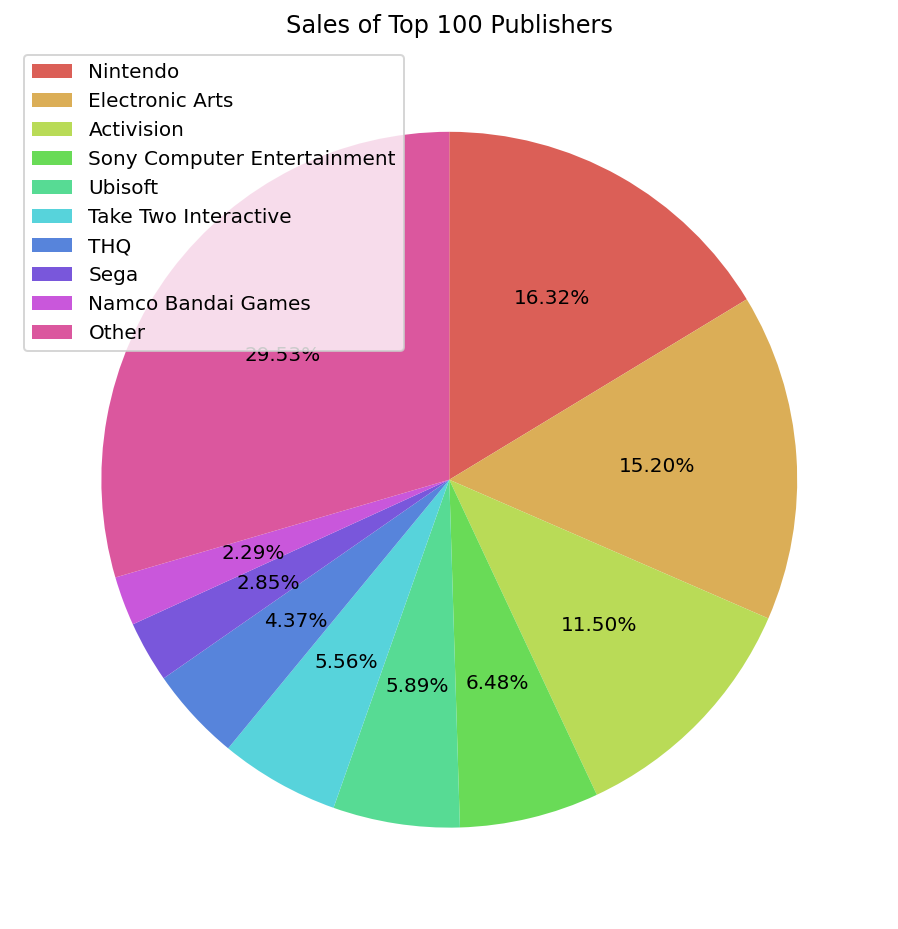

In [ ]:
# 총 매출 top100에서 각 제작사별 매출이 차지하는 비율 (단위 : 만)

data = [1743549.0, 1623877.0, 1228443.0, 692461.0, 628656.0, 594230.0, 466530.0, 304330.0, 244428.0, 3154360.0]
categories = ['Nintendo', 'Electronic Arts', 'Activision', 'Sony Computer Entertainment', 'Ubisoft', 'Take Two Interactive', 'THQ', 'Sega', 'Namco Bandai Games', 'Other']

labels = ['Nintendo', 'Electronic Arts', 'Activision', 'Sony Computer Entertainment', 'Ubisoft', 'Take Two Interactive', 'THQ', 'Sega', 'Namco Bandai Games', 'Other'] ## 라벨
frequency = [1743549.0, 1623877.0, 1228443.0, 692461.0, 628656.0, 594230.0, 466530.0, 304330.0, 244428.0, 3154360.0] ## 매출
 
colors = sns.color_palette('hls',len(labels)) ## 라벨의 개수 만큼 색상 리스트 생성 
 
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정

pie = ax.pie(frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       colors = colors ## 색상 지정
       )
plt.title('Sales of Top 100 Publishers')
plt.legend(pie[0],labels) ## 범례 표시
plt.show()